<a href="https://colab.research.google.com/github/punramon/bsc_dpdm24/blob/main/Model_653020213_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import data

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/bsc_dpdm24_data/BSC_DPDM24_Competition'

Mounted at /content/drive


In [ ]:
train_set = pd.read_csv(os.path.join(path,'train_set.csv'))
X_test = pd.read_csv(os.path.join(path,'X_test.csv'))
y_pred_baseline = pd.read_csv(os.path.join(path,'y_pred_baseline.csv'))

In [ ]:
train_set

,id number,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|,Thal_Group
0,67d169,25.0,11.1,34.0,78.0,3.2,0.0,55.9,4.358974,25.464706,32.647059,40.341026,18.141026,2.0,1.535294,3.070588,Abnormal_variants
1,67l168,32.0,13.9,42.0,86.0,3.7,0.3,54.8,5.197674,28.859060,33.557047,35.802326,5.802326,6.0,1.859060,11.154362,Abnormal_variants
2,67i267,43.0,10.1,31.0,78.0,2.6,0.3,56.2,3.974359,25.412903,32.580645,43.725641,23.525641,2.0,1.587097,3.174194,Abnormal_variants
3,67e248,33.0,12.9,38.0,76.0,3.0,0.2,61.2,5.000000,25.800000,33.947368,32.300000,6.500000,4.0,1.200000,4.800000,Abnormal_variants
4,67h277,23.0,12.9,40.0,78.0,3.1,0.0,55.6,5.128205,25.155000,32.250000,34.171795,8.371795,2.0,1.845000,3.690000,Abnormal_variants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,66z431,63.0,10.1,31.0,83.0,2.8,1.8,84.2,3.734940,27.041935,32.580645,48.965060,28.765060,3.0,0.041935,0.125806,Normal
4318,66z436,19.0,11.1,34.0,79.0,2.6,0.6,78.0,4.303797,25.791176,32.647059,41.396203,19.196203,1.0,1.208824,1.208824,Normal
4319,66z439,80.0,10.9,33.9,79.0,3.0,0.2,87.2,4.291139,25.401180,32.153392,42.008861,20.208861,1.0,1.598820,1.598820,Normal
4320,66z445,27.0,13.2,41.4,87.0,2.9,0.3,87.6,4.758621,27.739130,31.884058,42.641379,16.241379,7.0,0.739130,5.173913,Normal


In [ ]:
train_set['Thal_Group'].value_counts()

,count
Thal_Group,
Normal,1878
HbE_related,1025
Alpha_thal_related,959
Beta_thal_related,439
Abnormal_variants,18
Complex_genotypes,3


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id number          4322 non-null   object 
 1   Xn                 3887 non-null   float64
 2   Hb(Gm%)            4315 non-null   float64
 3   Hct(%)             4315 non-null   float64
 4   MCV(fl)            4315 non-null   float64
 5   A2 (2-3%)          4189 non-null   float64
 6   HbF (2%)           4206 non-null   float64
 7   HbA (95-97%)       4206 non-null   float64
 8   RBC                4315 non-null   float64
 9   MCH                4315 non-null   float64
 10  MCHC               4315 non-null   float64
 11  MCV-RBC-3*HGB      4315 non-null   float64
 12  MCV-RBC-5*HGB      4315 non-null   float64
 13  |80-MCV|           4315 non-null   float64
 14  |27-MCH|           4315 non-null   float64
 15  |80-MCV|*|27-MCH|  4315 non-null   float64
 16  Thal_Group         4322 

In [ ]:
missing_values = train_set.isnull().sum() / len(train_set) * 100
print(missing_values)

id number             0.000000
Xn                   10.064785
Hb(Gm%)               0.161962
Hct(%)                0.161962
MCV(fl)               0.161962
A2 (2-3%)             3.077279
HbF (2%)              2.683943
HbA (95-97%)          2.683943
RBC                   0.161962
MCH                   0.161962
MCHC                  0.161962
MCV-RBC-3*HGB         0.161962
MCV-RBC-5*HGB         0.161962
|80-MCV|              0.161962
|27-MCH|              0.161962
|80-MCV|*|27-MCH|     0.161962
Thal_Group            0.000000
dtype: float64


In [ ]:
train_set.describe()


,Xn,Hb(Gm%),Hct(%),MCV(fl),A2 (2-3%),HbF (2%),HbA (95-97%),RBC,MCH,MCHC,MCV-RBC-3*HGB,MCV-RBC-5*HGB,|80-MCV|,|27-MCH|,|80-MCV|*|27-MCH|
count,3887.000000,4315.000000,4315.000000,4315.000000,4189.000000,4206.000000,4206.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000,4315.000000
mean,40.510059,10.370717,32.448678,70.919177,11.530902,1.497967,80.268503,4.635384,22.654757,31.857088,34.924984,14.108856,10.002491,4.556300,72.895320
std,24.383982,1.997339,5.512625,9.471956,18.457527,5.985359,22.044018,0.789678,3.652130,1.543573,9.254880,10.762377,8.631753,3.427993,91.344636
min,0.000000,1.600000,3.700000,43.000000,0.000000,0.000000,0.000000,0.395062,8.703704,17.407407,4.967967,-20.333070,0.000000,0.000000,0.000000
25%,24.000000,9.400000,30.000000,64.000000,2.400000,0.000000,74.200000,4.291139,19.732143,30.947042,28.426374,7.420635,2.000000,1.598820,1.598820
50%,36.000000,10.700000,33.000000,73.000000,2.900000,0.400000,86.500000,4.605263,23.594248,32.153392,35.306897,12.894737,8.000000,3.654545,27.000000
75%,62.000000,11.350000,35.000000,79.000000,16.500000,1.100000,96.000000,5.079365,25.401180,32.727273,42.008861,20.208861,17.000000,7.267857,118.400000
max,97.000000,19.600000,53.100000,109.000000,100.000000,99.200000,118.900000,7.742601,36.364999,36.969697,83.949485,76.149485,43.000000,18.296296,548.888889


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_set['Thal_Group'] = le.fit_transform(train_set['Thal_Group'])

# สร้าง mapping ของ label ที่ถูกแปลง
label_mappings = {label: idx for idx, label in enumerate(le.classes_)}

# แสดงผลการ mapping
for original, encoded in label_mappings.items():
    print(f"  {original}: {encoded}")


  Abnormal_variants: 0
  Alpha_thal_related: 1
  Beta_thal_related: 2
  Complex_genotypes: 3
  HbE_related: 4
  Normal: 5


In [ ]:
  '''
  Abnormal_variants: 0
  Alpha_thal_related: 1
  Beta_thal_related: 2
  Complex_genotypes: 3
  HbE_related: 4
  Normal: 5
  '''

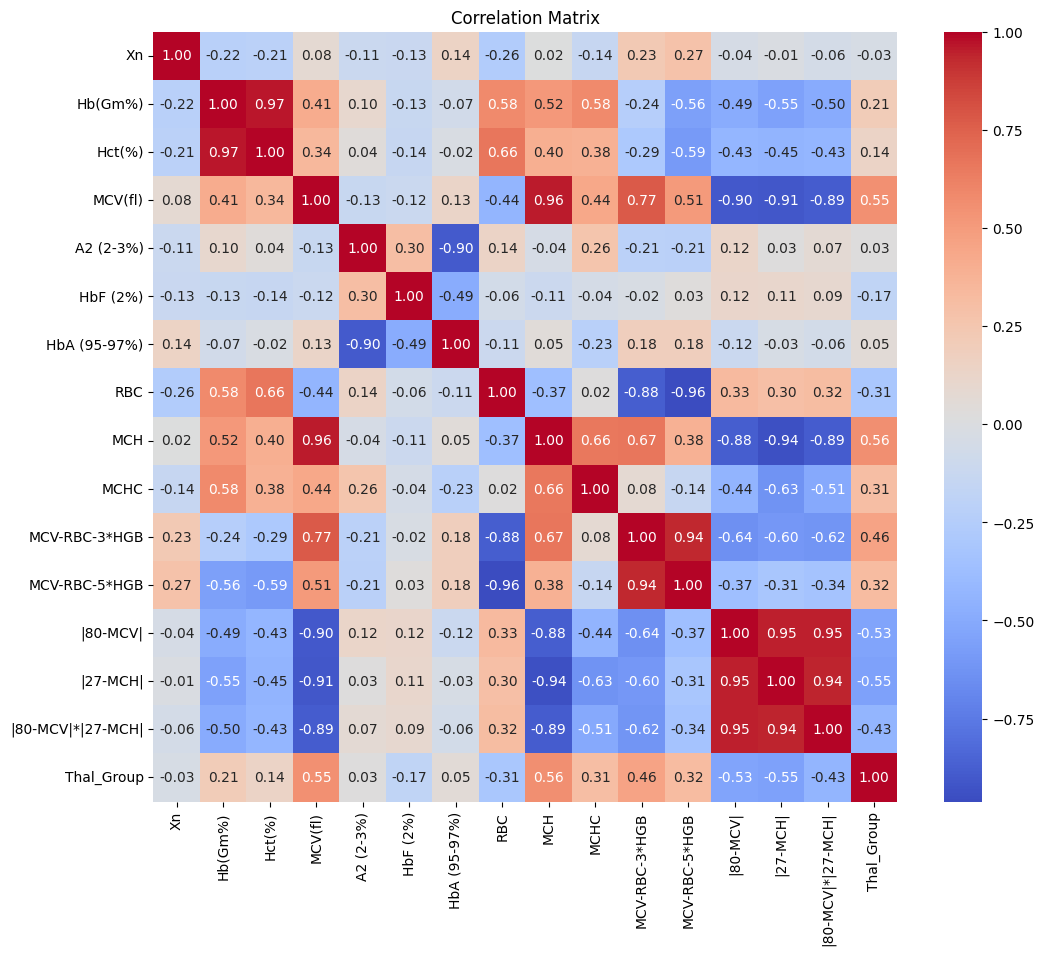

In [ ]:
# prompt: plot correlation not include id number

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_set' is your DataFrame
# Exclude 'ID' column from correlation analysis
correlation_matrix = train_set.drop('id number', axis=1).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
train_set_pre = train_set.dropna(subset=['Hb(Gm%)', 'Hct(%)', 'MCV(fl)'])

In [ ]:
missing_values = train_set_pre.isnull().sum() / len(train_set_pre) * 100
print(missing_values)

id number            0.000000
Xn                   9.965238
Hb(Gm%)              0.000000
Hct(%)               0.000000
MCV(fl)              0.000000
A2 (2-3%)            2.989571
HbF (2%)             2.595597
HbA (95-97%)         2.595597
RBC                  0.000000
MCH                  0.000000
MCHC                 0.000000
MCV-RBC-3*HGB        0.000000
MCV-RBC-5*HGB        0.000000
|80-MCV|             0.000000
|27-MCH|             0.000000
|80-MCV|*|27-MCH|    0.000000
Thal_Group           0.000000
dtype: float64


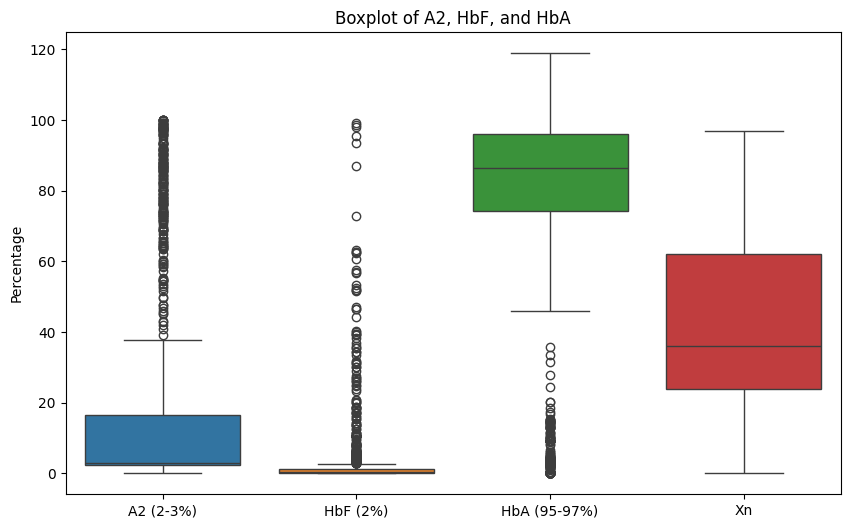

In [ ]:
# prompt: plot boxplot ofA2 (2-3%)
# HbF (2%)
# HbA (95-97%)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_set' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_set[['A2 (2-3%)', 'HbF (2%)', 'HbA (95-97%)','Xn']])
plt.title('Boxplot of A2, HbF, and HbA')
plt.ylabel('Percentage')
plt.show()


In [ ]:
for col in ['A2 (2-3%)', 'HbF (2%)', 'HbA (95-97%)']:
    train_set_pre[col] = train_set_pre.groupby('Thal_Group')[col].transform(lambda x: x.fillna(x.median()))

<ipython-input-37-ba9df6080bc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set_pre[col] = train_set_pre.groupby('Thal_Group')[col].transform(lambda x: x.fillna(x.median()))


In [ ]:
train_set_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4315 entries, 0 to 4321
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id number          4315 non-null   object 
 1   Xn                 3885 non-null   float64
 2   Hb(Gm%)            4315 non-null   float64
 3   Hct(%)             4315 non-null   float64
 4   MCV(fl)            4315 non-null   float64
 5   A2 (2-3%)          4315 non-null   float64
 6   HbF (2%)           4315 non-null   float64
 7   HbA (95-97%)       4315 non-null   float64
 8   RBC                4315 non-null   float64
 9   MCH                4315 non-null   float64
 10  MCHC               4315 non-null   float64
 11  MCV-RBC-3*HGB      4315 non-null   float64
 12  MCV-RBC-5*HGB      4315 non-null   float64
 13  |80-MCV|           4315 non-null   float64
 14  |27-MCH|           4315 non-null   float64
 15  |80-MCV|*|27-MCH|  4315 non-null   float64
 16  Thal_Group         4315 non-n

In [ ]:
# prompt: fill missing of Xn by mean

# Fill missing 'Xn' values with the mean of 'Xn'
train_set_pre['Xn'] = train_set_pre['Xn'].fillna(train_set_pre['Xn'].mean())


<ipython-input-40-5adef555a464>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set_pre['Xn'] = train_set_pre['Xn'].fillna(train_set_pre['Xn'].mean())


In [ ]:
train_set_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4315 entries, 0 to 4321
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id number          4315 non-null   object 
 1   Xn                 4315 non-null   float64
 2   Hb(Gm%)            4315 non-null   float64
 3   Hct(%)             4315 non-null   float64
 4   MCV(fl)            4315 non-null   float64
 5   A2 (2-3%)          4315 non-null   float64
 6   HbF (2%)           4315 non-null   float64
 7   HbA (95-97%)       4315 non-null   float64
 8   RBC                4315 non-null   float64
 9   MCH                4315 non-null   float64
 10  MCHC               4315 non-null   float64
 11  MCV-RBC-3*HGB      4315 non-null   float64
 12  MCV-RBC-5*HGB      4315 non-null   float64
 13  |80-MCV|           4315 non-null   float64
 14  |27-MCH|           4315 non-null   float64
 15  |80-MCV|*|27-MCH|  4315 non-null   float64
 16  Thal_Group         4315 non-n

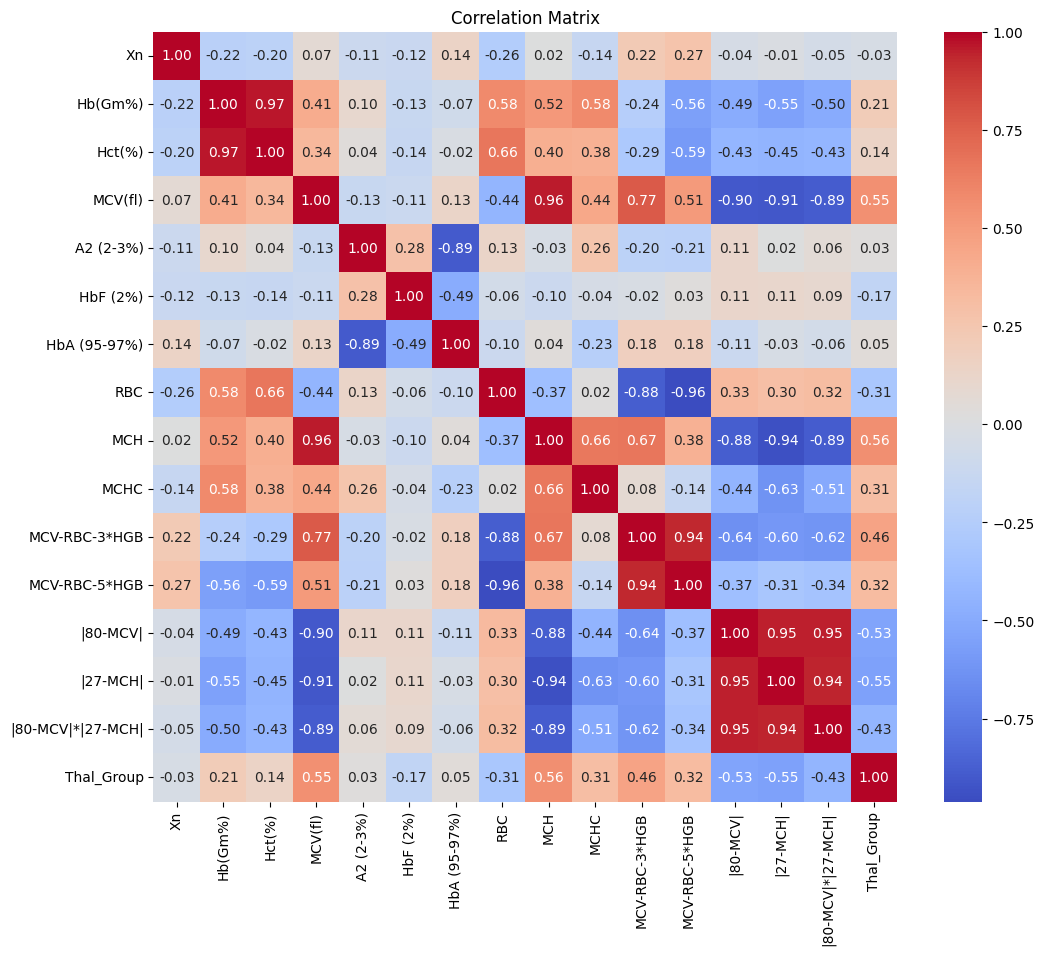

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_set' is your DataFrame
# Exclude 'ID' column from correlation analysis
correlation_matrix = train_set_pre.drop('id number', axis=1).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

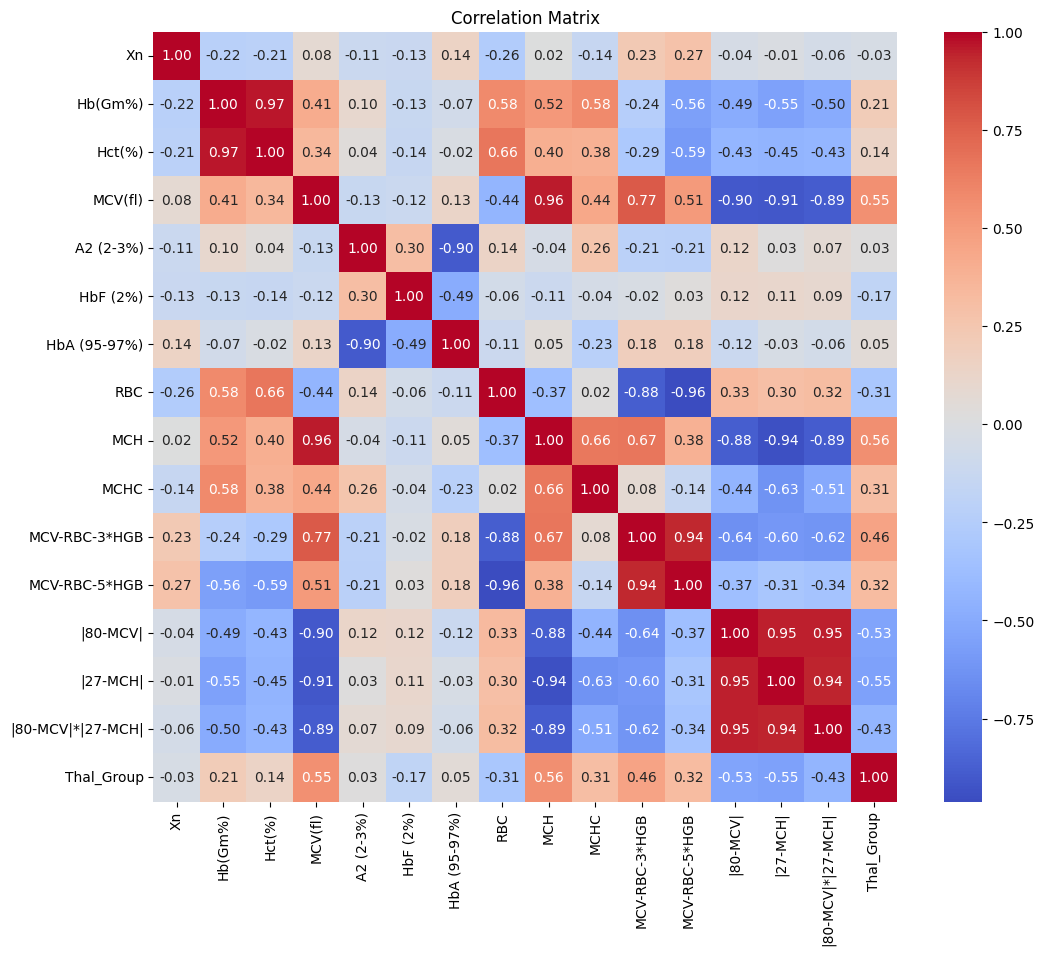

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_set' is your DataFrame
# Exclude 'ID' column from correlation analysis
correlation_matrix = train_set.drop('id number', axis=1).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
'''
id number             0.000000
Xn                   10.064785
Hb(Gm%)               0.161962
Hct(%)                0.161962
MCV(fl)               0.161962
A2 (2-3%)             3.077279
HbF (2%)              2.683943
HbA (95-97%)          2.683943
RBC                   0.161962
MCH                   0.161962
MCHC                  0.161962
MCV-RBC-3*HGB         0.161962
MCV-RBC-5*HGB         0.161962
|80-MCV|              0.161962
|27-MCH|              0.161962
|80-MCV|*|27-MCH|     0.161962
Thal_Group            0.000000
'''

# model ลอง

## xgboost

In [ ]:
Xn	Hb(Gm%)	Hct(%)	MCV(fl)	A2 (2-3%)	HbF (2%)	HbA (95-97%)	RBC	MCH	MCHC	MCV-RBC-3*HGB	MCV-RBC-5*HGB	|80-MCV|	|27-MCH|	|80-MCV|*|27-MCH|

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00


[I 2025-03-08 13:30:36,305] A new study created in memory with name: no-name-8df716a0-c62f-4e44-8f69-3b20442f1a2b


Thal_Group
5    1878
4    1023
1     955
2     438
0      18
3       3
Name: count, dtype: int64
Thal_Group
0    1878
2    1878
4    1878
1    1878
3    1878
5    1878
Name: count, dtype: int64


<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9809


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9818


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9733


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:30:57,968] Trial 0 finished with value: 0.9785701459517145 and parameters: {'n_estimators': 440, 'max_depth': 9, 'learning_rate': 0.2570696051089842, 'subsample': 0.7869910810413552, 'colsample_bytree': 0.6729235742663224, 'gamma': 0.0003516754049284477, 'scale_pos_weight': 3.926727336756997}. Best is trial 0 with value: 0.9785701459517145.


📌 Fold 5: 0.9791

📌 Cross-Validation Score (mean): 0.9786



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9738


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:30:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9724


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9715


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9705


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:31:09,903] Trial 1 finished with value: 0.972291496072307 and parameters: {'n_estimators': 137, 'max_depth': 5, 'learning_rate': 0.0260516573566015, 'subsample': 0.7589372833848685, 'colsample_bytree': 0.8679006225024288, 'gamma': 0.00042244470604709433, 'scale_pos_weight': 1.8276370740824044}. Best is trial 0 with value: 0.9785701459517145.


📌 Fold 5: 0.9733

📌 Cross-Validation Score (mean): 0.9723



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9795


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9759


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:31:25,928] Trial 2 finished with value: 0.9782924265645494 and parameters: {'n_estimators': 197, 'max_depth': 12, 'learning_rate': 0.07681995186226503, 'subsample': 0.9536656896172978, 'colsample_bytree': 0.9530411407260311, 'gamma': 0.007235882686452387, 'scale_pos_weight': 0.5021852645561309}. Best is trial 0 with value: 0.9785701459517145.


📌 Fold 5: 0.9795

📌 Cross-Validation Score (mean): 0.9783



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9795


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9742


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:31:52,792] Trial 3 finished with value: 0.9774993333197962 and parameters: {'n_estimators': 318, 'max_depth': 10, 'learning_rate': 0.03656047308579412, 'subsample': 0.6905023203221763, 'colsample_bytree': 0.9278065334417899, 'gamma': 0.004146400181461042, 'scale_pos_weight': 3.278236891286892}. Best is trial 0 with value: 0.9785701459517145.


📌 Fold 5: 0.9773

📌 Cross-Validation Score (mean): 0.9775



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9805


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9795


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9747


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:32:03,438] Trial 4 finished with value: 0.9786636384244225 and parameters: {'n_estimators': 186, 'max_depth': 8, 'learning_rate': 0.2783486315592648, 'subsample': 0.6353943010788218, 'colsample_bytree': 0.7134146892335629, 'gamma': 0.0001311991320862345, 'scale_pos_weight': 1.0642272235101333}. Best is trial 4 with value: 0.9786636384244225.


📌 Fold 5: 0.98

📌 Cross-Validation Score (mean): 0.9787



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.972


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:32:16,621] Trial 5 finished with value: 0.9774116545036582 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.053471694069512896, 'subsample': 0.741039992655575, 'colsample_bytree': 0.6433960058641495, 'gamma': 0.03803714973473518, 'scale_pos_weight': 0.5604413265326716}. Best is trial 4 with value: 0.9786636384244225.


📌 Fold 5: 0.9782

📌 Cross-Validation Score (mean): 0.9774



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.976


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:32:35,830] Trial 6 finished with value: 0.9792824208441939 and parameters: {'n_estimators': 353, 'max_depth': 7, 'learning_rate': 0.06914870249629464, 'subsample': 0.8613216139157287, 'colsample_bytree': 0.673980615239112, 'gamma': 0.00041086336213850297, 'scale_pos_weight': 1.4946789751269374}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9804

📌 Cross-Validation Score (mean): 0.9793



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9774


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9729


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:32:49,684] Trial 7 finished with value: 0.9769838096399124 and parameters: {'n_estimators': 307, 'max_depth': 4, 'learning_rate': 0.0649871804558359, 'subsample': 0.8737944043417654, 'colsample_bytree': 0.7334626806550043, 'gamma': 0.0010596828332415386, 'scale_pos_weight': 4.7059367850270215}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9782

📌 Cross-Validation Score (mean): 0.977



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9795


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9746


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:33:05,410] Trial 8 finished with value: 0.977857150230695 and parameters: {'n_estimators': 272, 'max_depth': 6, 'learning_rate': 0.05999128583120873, 'subsample': 0.692961854441893, 'colsample_bytree': 0.7714416081084908, 'gamma': 0.0002641574446679691, 'scale_pos_weight': 3.297501245634386}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9791

📌 Cross-Validation Score (mean): 0.9779



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9773


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9755


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9732


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:33:44,088] Trial 9 finished with value: 0.9764185871117071 and parameters: {'n_estimators': 348, 'max_depth': 10, 'learning_rate': 0.017148985426324263, 'subsample': 0.6859547189200007, 'colsample_bytree': 0.8695244816329191, 'gamma': 0.0067725067514887395, 'scale_pos_weight': 0.8187554137997531}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9769

📌 Cross-Validation Score (mean): 0.9764



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9746


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:33:58,980] Trial 10 finished with value: 0.9780406091498193 and parameters: {'n_estimators': 488, 'max_depth': 3, 'learning_rate': 0.12222933340300007, 'subsample': 0.8781595751949373, 'colsample_bytree': 0.6374573214190997, 'gamma': 0.0898364786538174, 'scale_pos_weight': 0.14190634533493354}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9782

📌 Cross-Validation Score (mean): 0.978



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9818


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:34:15,231] Trial 11 finished with value: 0.9788420434899663 and parameters: {'n_estimators': 401, 'max_depth': 7, 'learning_rate': 0.2812172870458767, 'subsample': 0.6344968937533401, 'colsample_bytree': 0.7241498267498085, 'gamma': 0.0001093356832491571, 'scale_pos_weight': 1.6194086595541086}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9791

📌 Cross-Validation Score (mean): 0.9788



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9809


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9742


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:34:35,133] Trial 12 finished with value: 0.9786623591340374 and parameters: {'n_estimators': 394, 'max_depth': 7, 'learning_rate': 0.14726479103768944, 'subsample': 0.8629452650144537, 'colsample_bytree': 0.7987505944921096, 'gamma': 0.0012717215858582785, 'scale_pos_weight': 1.5044327750863202}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9804

📌 Cross-Validation Score (mean): 0.9787



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9809


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.976


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:34:51,553] Trial 13 finished with value: 0.9788379630799801 and parameters: {'n_estimators': 391, 'max_depth': 7, 'learning_rate': 0.14728929944485733, 'subsample': 0.9998096144636184, 'colsample_bytree': 0.6009033831338858, 'gamma': 0.00010262564038531577, 'scale_pos_weight': 7.8252931223105415}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9782

📌 Cross-Validation Score (mean): 0.9788



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9752


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:34:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9747


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9742


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:35:28,311] Trial 14 finished with value: 0.9756253544428859 and parameters: {'n_estimators': 385, 'max_depth': 8, 'learning_rate': 0.010405718076000575, 'subsample': 0.825084627214318, 'colsample_bytree': 0.716528658979261, 'gamma': 0.0010710371733811113, 'scale_pos_weight': 0.16321111020375248}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9764

📌 Cross-Validation Score (mean): 0.9756



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9792


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9746


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:35:55,517] Trial 15 finished with value: 0.978134952139083 and parameters: {'n_estimators': 493, 'max_depth': 6, 'learning_rate': 0.10430592580122604, 'subsample': 0.616406755185612, 'colsample_bytree': 0.8438634564621564, 'gamma': 0.00022444046005843342, 'scale_pos_weight': 0.30385157857445383}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9786

📌 Cross-Validation Score (mean): 0.9781



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:35:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9809


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9774


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:36:12,802] Trial 16 finished with value: 0.9784908690100249 and parameters: {'n_estimators': 439, 'max_depth': 9, 'learning_rate': 0.2099077871017671, 'subsample': 0.9218292707066842, 'colsample_bytree': 0.7558538631019958, 'gamma': 0.0007543471875497232, 'scale_pos_weight': 1.7601352045544858}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9782

📌 Cross-Validation Score (mean): 0.9785



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9751


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:36:33,771] Trial 17 finished with value: 0.9777638886636444 and parameters: {'n_estimators': 342, 'max_depth': 6, 'learning_rate': 0.035941641233110895, 'subsample': 0.8299765166154256, 'colsample_bytree': 0.6864131535635417, 'gamma': 0.0001489633917855373, 'scale_pos_weight': 9.687909558167664}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.98

📌 Cross-Validation Score (mean): 0.9778



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9795


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9751


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:36:53,058] Trial 18 finished with value: 0.9784925642953267 and parameters: {'n_estimators': 437, 'max_depth': 12, 'learning_rate': 0.1762671116095436, 'subsample': 0.7339786307607478, 'colsample_bytree': 0.8202833443133517, 'gamma': 0.0023690747718918873, 'scale_pos_weight': 2.2368880314778323}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.9804

📌 Cross-Validation Score (mean): 0.9785



<ipython-input-30-3297f0b354b6>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-30-3297f0b354b6>:33: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-30-3297f0b354b6>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9809


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9768


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 13:37:09,739] Trial 19 finished with value: 0.978832650146872 and parameters: {'n_estimators': 259, 'max_depth': 9, 'learning_rate': 0.09014664590513136, 'subsample': 0.9160223321045581, 'colsample_bytree': 0.9964693380166361, 'gamma': 0.0005340126570719675, 'scale_pos_weight': 1.1234277093475966}. Best is trial 6 with value: 0.9792824208441939.


📌 Fold 5: 0.98

📌 Cross-Validation Score (mean): 0.9788



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Best F1-Score (Train): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       955
           2       1.00      1.00      1.00       438
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1023
           5       1.00      1.00      1.00      1878

    accuracy                           1.00      4315
   macro avg       1.00      1.00      1.00      4315
weighted avg       1.00      1.00      1.00      4315



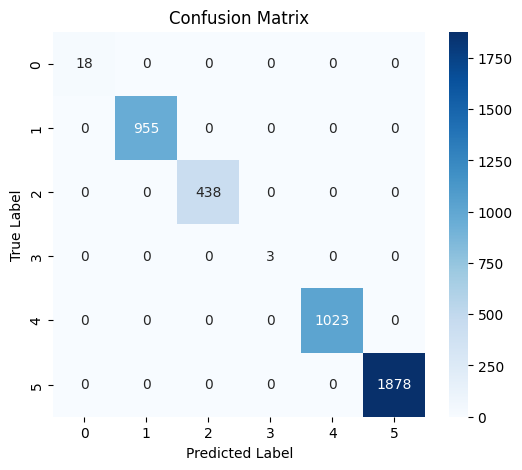

📌 Best Hyperparameters from Optuna:
{'n_estimators': 353, 'max_depth': 7, 'learning_rate': 0.06914870249629464, 'subsample': 0.8613216139157287, 'colsample_bytree': 0.673980615239112, 'gamma': 0.00041086336213850297, 'scale_pos_weight': 1.4946789751269374}


In [ ]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# ✅ 1. โหลดและเตรียมข้อมูล
feature_cols = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']

X_train = train_set_pre.loc[:, feature_cols]
y_train = train_set_pre['Thal_Group']

# ✅ 2. จัดการ Imbalanced Data ด้วย SMOTE
print(y_train.value_counts())

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())

# ✅ 3. ฟังก์ชัน Optuna เพื่อ Tune Hyperparameters ของ XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 0.1, 10)
    }

    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    f1_scores = []  # เก็บค่า F1-Score ของแต่ละ Fold
    for fold, (train_idx, valid_idx) in enumerate(skf.split(X_train_resampled, y_train_resampled), 1):
        X_fold_train, X_fold_valid = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[valid_idx]

        model.fit(X_fold_train, y_fold_train)
        y_fold_pred = model.predict(X_fold_valid)
        f1 = f1_score(y_fold_valid, y_fold_pred, average='weighted')
        f1_scores.append(f1)

        print(f"📌 Fold {fold}: {round(f1, 4)}")

    mean_f1 = np.mean(f1_scores)
    print(f"\n📌 Cross-Validation Score (mean): {round(mean_f1, 4)}\n")

    return mean_f1

# ✅ 4. รัน Optuna เพื่อหา Hyperparameters ที่ดีที่สุด
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

# ✅ 5. เทรนโมเดลด้วยค่าพารามิเตอร์ที่ดีที่สุด
best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_resampled, y_train_resampled)

# ✅ 6. ประเมินผลลัพธ์
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')
print("📌 Best F1-Score (Train):", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# ✅ 7. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ✅ 8. สรุปค่าพารามิเตอร์ที่ดีที่สุด
print("📌 Best Hyperparameters from Optuna:")
print(best_params)


In [ ]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ✅ 1. โหลดและเตรียมข้อมูล
feature_cols = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']

X_train = train_set_pre.loc[:, feature_cols]
y_train = train_set_pre['Thal_Group']

# ✅ 1. แบ่ง Train/Validation/Test (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(train_set_pre[feature_cols], train_set_pre['Thal_Group'],
                                                    test_size=0.1, random_state=42, stratify=train_set_pre['Thal_Group'])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("📌 Train:", X_train.shape, "📌 Validation:", X_val.shape, "📌 Test:", X_test.shape)

# ✅ 2. จัดการ Imbalanced Data ด้วย SMOTE
print(y_train.value_counts())
#ใช้ SMOTE เฉพาะกับชุด Train
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print(y_train_resampled.value_counts())

# ✅ 3. ฟังก์ชัน Optuna เพื่อ Tune Hyperparameters ของ XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 0.1, 10)
    }

    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    f1_scores = []  # เก็บค่า F1-Score ของแต่ละ Fold
    for fold, (train_idx, valid_idx) in enumerate(skf.split(X_train_resampled, y_train_resampled), 1):
        X_fold_train, X_fold_valid = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[valid_idx]

        model.fit(X_fold_train, y_fold_train)
        y_fold_pred = model.predict(X_fold_valid)
        f1 = f1_score(y_fold_valid, y_fold_pred, average='weighted')
        f1_scores.append(f1)

        print(f"📌 Fold {fold}: {round(f1, 4)}")

    mean_f1 = np.mean(f1_scores)
    print(f"\n📌 Cross-Validation Score (mean): {round(mean_f1, 4)}\n")

    return mean_f1

# ✅ 4. รัน Optuna เพื่อหา Hyperparameters ที่ดีที่สุด
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

# ✅ 5. เทรนโมเดลด้วยค่าพารามิเตอร์ที่ดีที่สุด
best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_resampled, y_train_resampled)

# ✅ 6. ประเมินผลลัพธ์
# ✅ 4. ทดสอบบนชุด Validation
y_val_pred = best_model.predict(X_val)
f1_val = f1_score(y_val, y_val_pred, average='weighted')
print("📌 Validation F1-Score:", round(f1_val, 4))

# ✅ 5. ทดสอบบนชุด Test
y_test_pred = best_model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print("📌 Test F1-Score:", round(f1_test, 4))

# ✅ 6. แสดง Confusion Matrix ของชุด Test
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.show()

# ✅ 8. สรุปค่าพารามิเตอร์ที่ดีที่สุด
print("📌 Best Hyperparameters from Optuna:")
print(best_params)

[I 2025-03-08 14:35:05,546] A new study created in memory with name: no-name-3cbd34bf-1c14-48e2-983e-a068b3454a4d


📌 Train: (3883, 15) 📌 Validation: (216, 15) 📌 Test: (216, 15)
Thal_Group
5    1690
4     921
1     859
2     394
0      16
3       3
Name: count, dtype: int64
Thal_Group
5    1690
4    1690
1    1690
2    1690
0    1690
3    1690
Name: count, dtype: int64


<ipython-input-33-e6c8ccf58c30>:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-33-e6c8ccf58c30>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9476


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9482


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9519


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9522


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:35:14,897] Trial 0 finished with value: 0.9499267911851567 and parameters: {'n_estimators': 215, 'max_depth': 3, 'learning_rate': 0.010075375109982123, 'subsample': 0.9302650386448209, 'colsample_bytree': 0.9873899803328456, 'gamma': 0.0025897009506570963, 'scale_pos_weight': 0.6394190607076911}. Best is trial 0 with value: 0.9499267911851567.


📌 Fold 5: 0.9498

📌 Cross-Validation Score (mean): 0.9499



<ipython-input-33-e6c8ccf58c30>:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-33-e6c8ccf58c30>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9758


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9793


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9802


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:35:27,872] Trial 1 finished with value: 0.9775691200884232 and parameters: {'n_estimators': 439, 'max_depth': 8, 'learning_rate': 0.18721213466537193, 'subsample': 0.9949140192382101, 'colsample_bytree': 0.8191456292854788, 'gamma': 0.039528221820370905, 'scale_pos_weight': 0.16356153117200808}. Best is trial 1 with value: 0.9775691200884232.


📌 Fold 5: 0.9704

📌 Cross-Validation Score (mean): 0.9776



<ipython-input-33-e6c8ccf58c30>:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-33-e6c8ccf58c30>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9762


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9812


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9832


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:36:04,753] Trial 2 finished with value: 0.9780436107870605 and parameters: {'n_estimators': 280, 'max_depth': 11, 'learning_rate': 0.012069322408053858, 'subsample': 0.9505878327671209, 'colsample_bytree': 0.9209737208033723, 'gamma': 0.0020702697203781387, 'scale_pos_weight': 0.1377980011137881}. Best is trial 2 with value: 0.9780436107870605.


📌 Fold 5: 0.9708

📌 Cross-Validation Score (mean): 0.978



<ipython-input-33-e6c8ccf58c30>:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-33-e6c8ccf58c30>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9758


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:36:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9793


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:36:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:36:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9817


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:36:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:36:19,306] Trial 3 finished with value: 0.9779649400584903 and parameters: {'n_estimators': 236, 'max_depth': 6, 'learning_rate': 0.03770796898488446, 'subsample': 0.7689534271490738, 'colsample_bytree': 0.7997632879626992, 'gamma': 0.004621175940322107, 'scale_pos_weight': 3.7696367601022267}. Best is trial 2 with value: 0.9780436107870605.


📌 Fold 5: 0.9709

📌 Cross-Validation Score (mean): 0.978



<ipython-input-33-e6c8ccf58c30>:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-33-e6c8ccf58c30>:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-33-e6c8ccf58c30>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9777


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[W 2025-03-08 14:36:31,090] Trial 4 failed with parameters: {'n_estimators': 481, 'max_depth': 12, 'learning_rate': 0.01483883481999903, 'subsample': 0.7737956012013426, 'colsample_bytree': 0.9056447218982315, 'gamma': 0.00015208047259842027, 'scale_pos_weight': 0.43174012334796497} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-33-e6c8ccf58c30>", line 56, in objective
    model.fit(X_fold_train, y_fold_train)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
         

KeyboardInterrupt: 

In [ ]:
print(train_set_pre.columns)


Index(['id number', 'Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)',
       'HbF (2%)', 'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
       'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|',
       'Thal_Group'],
      dtype='object')


[I 2025-03-08 13:15:18,721] A new study created in memory with name: no-name-aed1e18d-e40b-4710-8135-cd6fcbeb2510


Thal_Group
5    1878
4    1023
1     955
2     438
0      18
3       3
Name: count, dtype: int64
Thal_Group
0    1878
2    1878
4    1878
1    1878
3    1878
5    1878
Name: count, dtype: int64


<ipython-input-17-d816c3ee9817>:37: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-17-d816c3ee9817>:38: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-17-d816c3ee9817>:39: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-17-d816c3ee9817>:40: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Best F1-Score (Train): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00       955
           2       1.00      1.00      1.00       438
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1023
           5       1.00      1.00      1.00      1878

    accuracy                           1.00      4315
   macro avg       1.00      1.00      1.00      4315
weighted avg       1.00      1.00      1.00      4315



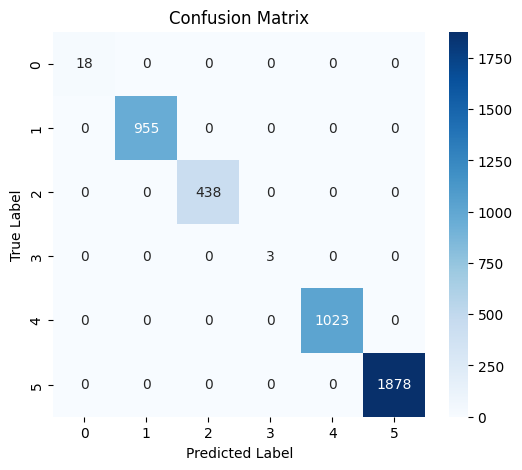

📌 Best Hyperparameters from Optuna:
{'n_estimators': 489, 'max_depth': 9, 'learning_rate': 0.15632760870342188, 'subsample': 0.6091649834407322, 'colsample_bytree': 0.7250677926086389, 'gamma': 0.057892394638275536, 'scale_pos_weight': 0.49598839655981203}


In [ ]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# ✅ 1. โหลดและเตรียมข้อมูล
X_train = train_set_pre[['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                     'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                     'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']]
y_train = train_set_pre['Thal_Group']

# ✅ 2. Feature Engineering (สร้างฟีเจอร์ใหม่)
X_train = X_train.copy()  # ป้องกันปัญหาการแก้ไข DataFrame เดิม
X_train.loc[:, 'MCHC'] = X_train['MCH'] / X_train['MCV(fl)']
X_train.loc[:, 'HbA2_HbA'] = X_train['A2 (2-3%)'] / (X_train['HbA (95-97%)'] + 1e-5)

# ✅ 3. จัดการ Imbalanced Data ด้วย SMOTE
# ตรวจสอบขนาดของแต่ละคลาสก่อนใช้ SMOTE
print(y_train.value_counts())

# ใช้ SMOTE แต่ลดจำนวน neighbors ให้เหมาะสม
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)  # ลด k_neighbors จาก 6 → 2
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())  # ตรวจสอบผลลัพธ์หลัง Oversampling

# ✅ 4. ฟังก์ชัน Optuna เพื่อ Tune Hyperparameters ของ XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 0.1, 10)
    }

    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(model, X_train_resampled, y_train_resampled, cv=skf, scoring='f1_weighted').mean()
    return f1

# ✅ 5. รัน Optuna เพื่อหา Hyperparameters ที่ดีที่สุด
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

# ✅ 6. เทรนโมเดลด้วยค่าพารามิเตอร์ที่ดีที่สุด
best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_resampled, y_train_resampled)

# ✅ 7. ประเมินผลลัพธ์
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')
print("📌 Best F1-Score (Train):", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# ✅ 8. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ✅ 9. สรุปค่าพารามิเตอร์ที่ดีที่สุด
print("📌 Best Hyperparameters from Optuna:")
print(best_params)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from collections import Counter

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว (ไม่ต้องแบ่ง Train-Test)
df = train_set  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                     'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                     'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']
X_train = df[selected_features]
y_train = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# คำนวณค่า scale_pos_weight
class_counts = Counter(y_train)
majority_class = max(class_counts.values())
scale_pos_weight = {cls: majority_class / count for cls, count in class_counts.items()}

# 🎯 4. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                    scale_pos_weight=list(scale_pos_weight.values()))

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 🎯 5. ดึง Best Parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_

# 🎯 6. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 🎯 7. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🎯 8. แสดง Classification Report
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:48:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


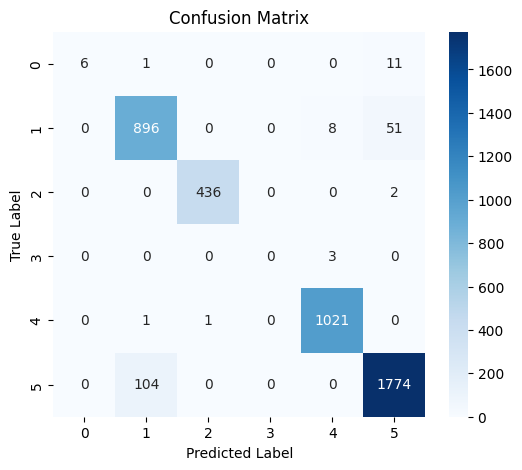

📌 Best Parameters: {'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
📌 Cross-Validation Score (Best F1-Score from CV): 0.8405
📌 Train F1-Score: 0.957

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        18
           1       0.89      0.94      0.92       955
           2       1.00      1.00      1.00       438
           3       0.00      0.00      0.00         3
           4       0.99      1.00      0.99      1023
           5       0.97      0.94      0.95      1878

    accuracy                           0.96      4315
   macro avg       0.81      0.70      0.73      4315
weighted avg       0.96      0.96      0.96      4315



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว (ไม่ต้องแบ่ง Train-Test)
df = train_set_pre  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['MCV(fl)', 'A2 (2-3%)', 'MCV-RBC-3*HGB', 'MCHC', 'Hb(Gm%)', 'Hct(%)']
X_train = df[selected_features]
y_train = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'min_child_weight': [3],   # ป้องกันการแยกโหนดที่ไม่จำเป็น
    'gamma': [0.1, 0.3, 0.5] # เพิ่มการ Regularization
}

# 🎯 4. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 🎯 5. ดึง Best Parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_

# 🎯 6. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 🎯 7. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🎯 8. แสดง Classification Report
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:57:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


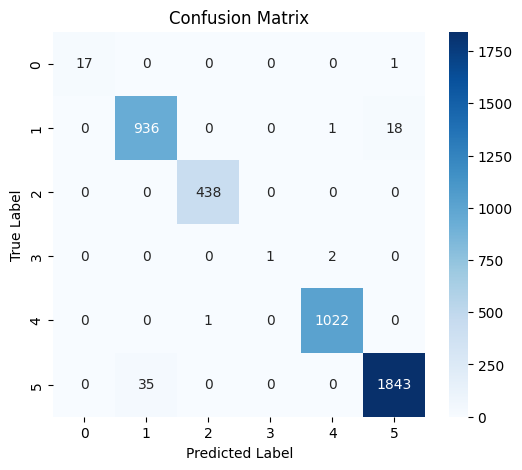

📌 Best Parameters: {'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.7}
📌 Cross-Validation Score (Best F1-Score from CV): 0.877
📌 Train F1-Score: 0.9865

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.96      0.98      0.97       955
           2       1.00      1.00      1.00       438
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00      1023
           5       0.99      0.98      0.99      1878

    accuracy                           0.99      4315
   macro avg       0.99      0.87      0.90      4315
weighted avg       0.99      0.99      0.99      4315



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว (ไม่ต้องแบ่ง Train-Test)
df = train_set_pre  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['Xn',	'Hb(Gm%)',	'Hct(%)',	'MCV(fl)',	'A2 (2-3%)',	'HbF (2%)',	'HbA (95-97%)',	'RBC',	'MCH',	'MCHC',	'MCV-RBC-3*HGB',	'MCV-RBC-5*HGB',	'|80-MCV|',	'|27-MCH|',	'|80-MCV|*|27-MCH|']
X_train = df[selected_features]
y_train = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'min_child_weight': [3],   # ป้องกันการแยกโหนดที่ไม่จำเป็น
    'gamma': [0.1, 0.3, 0.5] # เพิ่มการ Regularization
}

# 🎯 4. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 🎯 5. ดึง Best Parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_

# 🎯 6. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 🎯 7. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🎯 8. แสดง Classification Report
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))



---



## randomforest

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


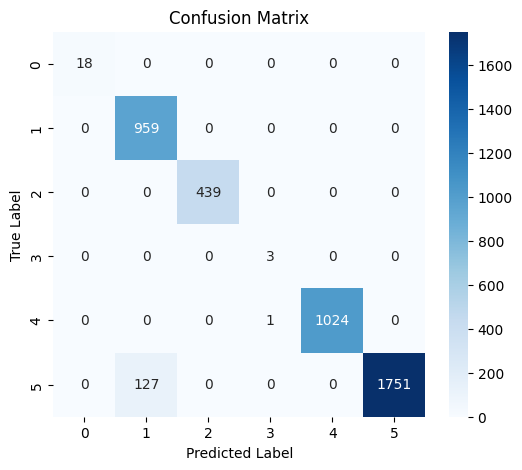

📌 Best Parameters: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}
📌 Cross-Validation Score (Best F1-Score from CV): 0.9356
📌 Train F1-Score: 0.9708

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.94       959
           2       1.00      1.00      1.00       439
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00      1025
           5       1.00      0.93      0.97      1878

    accuracy                           0.97      4322
   macro avg       0.94      0.99      0.96      4322
weighted avg       0.97      0.97      0.97      4322


📌 F1-Score ของแต่ละรอบจาก Cross-Validation:
  - Fold 1: 0.9289
  - Fold 2: 0.9333
  - Fold 3: 0.9423
  - Fold 4: 0.9341
  - Fold 5: 0.9392


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว
df = train_set # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                     'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                     'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']
X_train = df[selected_features]
y_train = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [100, 150],          # เพิ่มจำนวน estimators
    'max_depth': [5, 10, 12],               # ลด max_depth ลง
    'min_samples_split': [5, 10],        # ป้องกันการแตก node มากเกินไป
    'min_samples_leaf': [3, 4],          # ให้มีตัวอย่างใน leaf มากขึ้น
    'bootstrap': [True, False],          # ทดสอบ bootstrap
    'class_weight': ['balanced_subsample']  # ปรับสมดุล class อัตโนมัติ
}

# 🎯 4. ใช้ Stratified K-Fold เพื่อให้แต่ละ Fold มีสัดส่วนของ class เท่ากัน
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🎯 5. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 🎯 6. ดึง Best Parameters และค่า CV Scores
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_
cv_results = grid_search.cv_results_  # ดึงผลลัพธ์ทั้งหมดของ CV

# 🎯 7. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 🎯 8. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🎯 9. แสดง Classification Report
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# 🎯 10. แสดงค่า F1-Score ของแต่ละรอบจาก Cross-Validation
print("\n📌 F1-Score ของแต่ละรอบจาก Cross-Validation:")
for i in range(5):  # มีทั้งหมด 5 fold
    print(f"  - Fold {i+1}: {round(cv_results['split'+str(i)+'_test_score'][grid_search.best_index_], 4)}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


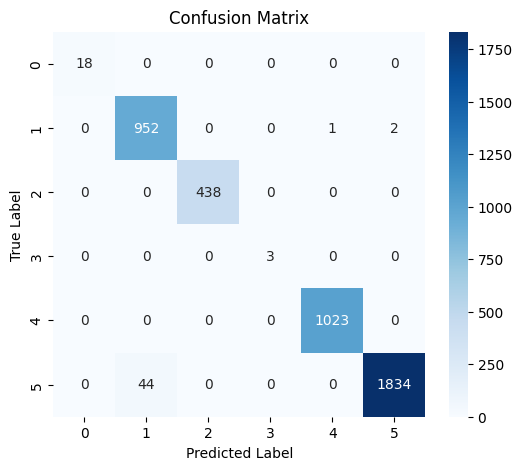

📌 Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
📌 Cross-Validation Score (Best F1-Score from CV): 0.8707
📌 Train F1-Score: 0.9892

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.96      1.00      0.98       955
           2       1.00      1.00      1.00       438
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      1023
           5       1.00      0.98      0.99      1878

    accuracy                           0.99      4315
   macro avg       0.99      1.00      0.99      4315
weighted avg       0.99      0.99      0.99      4315


📌 F1-Score ของแต่ละรอบจาก Cross-Validation:
  - Fold 1: 0.7084
  - Fold 2: 0.8109
  - Fold 3: 0.975
  - Fold 4: 0.9762
  - Fold 5: 0.883


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว
df = train_set_pre  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                     'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                     'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']
X_train = df[selected_features]
y_train = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [50, 100, 150],   # จำนวนต้นไม้
    'max_depth': [5, 10, 15],         # ความลึกของต้นไม้
    'min_samples_split': [2, 5, 10],  # จำนวนตัวอย่างขั้นต่ำที่ต้องมีเพื่อแยก node
    'min_samples_leaf': [1, 2, 4],    # จำนวนตัวอย่างขั้นต่ำที่ต้องมีใน leaf node
    'bootstrap': [True, False],        # ใช้ Bootstrapping หรือไม่
    'class_weight': [None, 'balanced']
}

# 🎯 4. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 🎯 5. ดึง Best Parameters และค่า CV Scores
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_
cv_results = grid_search.cv_results_  # ดึงผลลัพธ์ทั้งหมดของ CV

# 🎯 6. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 🎯 7. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🎯 8. แสดง Classification Report
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# 🎯 9. แสดงค่า CV Score ของแต่ละรอบ
print("\n📌 F1-Score ของแต่ละรอบจาก Cross-Validation:")
for i in range(5):  # มีทั้งหมด 5 fold
    print(f"  - Fold {i+1}: {round(cv_results['split'+str(i)+'_test_score'][grid_search.best_index_], 4)}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 🎯 1. กำหนดพารามิเตอร์ใหม่ให้ลด Overfitting
param_grid = {
    'n_estimators': [100, 150],          # เพิ่มจำนวน estimators
    'max_depth': [10, 12],               # ลด max_depth ลง
    'min_samples_split': [5, 10],        # ป้องกันการแตก node มากเกินไป
    'min_samples_leaf': [3, 4],          # ให้มีตัวอย่างใน leaf มากขึ้น
    'bootstrap': [True, False],          # ทดสอบ bootstrap
    'class_weight': ['balanced_subsample']  # ปรับสมดุล class อัตโนมัติ
}

# 🎯 2. ใช้ Stratified K-Fold เพื่อให้แต่ละ Fold มีสัดส่วนของ class เท่ากัน
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🎯 3. ใช้ GridSearchCV หา Best Parameters
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 🎯 4. แสดงค่า F1-Score ของแต่ละรอบ
cv_results = grid_search.cv_results_
print("\n📌 F1-Score ของแต่ละรอบจาก Cross-Validation:")
for i in range(5):
    print(f"  - Fold {i+1}: {round(cv_results['split'+str(i)+'_test_score'][grid_search.best_index_], 4)}")

# 🎯 5. แสดงผลลัพธ์ใหม่
print("\n📌 Best Parameters:", grid_search.best_params_)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(grid_search.best_score_, 4))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



📌 F1-Score ของแต่ละรอบจาก Cross-Validation:
  - Fold 1: 0.9279
  - Fold 2: 0.9344
  - Fold 3: 0.9384
  - Fold 4: 0.93
  - Fold 5: 0.936

📌 Best Parameters: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
📌 Cross-Validation Score (Best F1-Score from CV): 0.9333


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


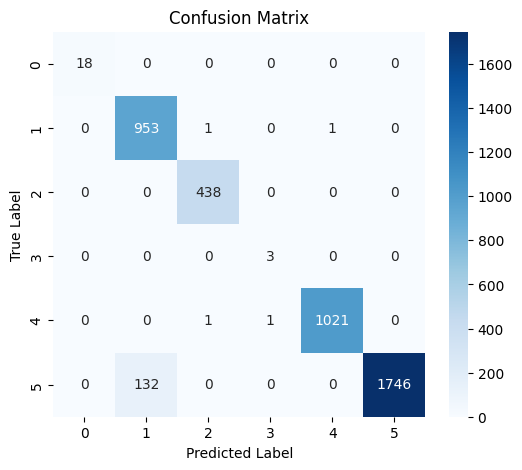

📌 Best Parameters: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
📌 Cross-Validation Score (Best F1-Score from CV): 0.9333
📌 Train F1-Score: 0.9689

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.93       955
           2       1.00      1.00      1.00       438
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00      1023
           5       1.00      0.93      0.96      1878

    accuracy                           0.97      4315
   macro avg       0.94      0.99      0.96      4315
weighted avg       0.97      0.97      0.97      4315


📌 F1-Score ของแต่ละรอบจาก Cross-Validation:
  - Fold 1: 0.9279
  - Fold 2: 0.9344
  - Fold 3: 0.9384
  - Fold 4: 0.93
  - Fold 5: 0.936


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว
df = train_set_pre  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                     'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                     'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']
X_train = df[selected_features]
y_train = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [100, 150],          # เพิ่มจำนวน estimators
    'max_depth': [5, 10, 12],               # ลด max_depth ลง
    'min_samples_split': [5, 10],        # ป้องกันการแตก node มากเกินไป
    'min_samples_leaf': [3, 4],          # ให้มีตัวอย่างใน leaf มากขึ้น
    'bootstrap': [True, False],          # ทดสอบ bootstrap
    'class_weight': ['balanced_subsample']  # ปรับสมดุล class อัตโนมัติ
}

# 🎯 4. ใช้ Stratified K-Fold เพื่อให้แต่ละ Fold มีสัดส่วนของ class เท่ากัน
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🎯 5. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 🎯 6. ดึง Best Parameters และค่า CV Scores
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_
cv_results = grid_search.cv_results_  # ดึงผลลัพธ์ทั้งหมดของ CV

# 🎯 7. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 🎯 8. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🎯 9. แสดง Classification Report
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# 🎯 10. แสดงค่า F1-Score ของแต่ละรอบจาก Cross-Validation
print("\n📌 F1-Score ของแต่ละรอบจาก Cross-Validation:")
for i in range(5):  # มีทั้งหมด 5 fold
    print(f"  - Fold {i+1}: {round(cv_results['split'+str(i)+'_test_score'][grid_search.best_index_], 4)}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


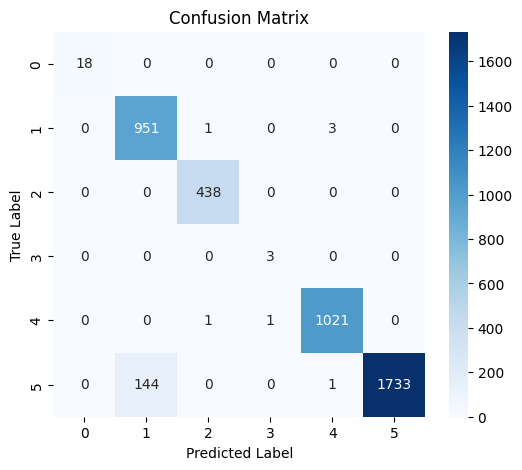

📌 Best Parameters: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
📌 Cross-Validation Score (Best F1-Score from CV): 0.9321
📌 Train F1-Score: 0.9655

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.87      1.00      0.93       955
           2       1.00      1.00      1.00       438
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00      1023
           5       1.00      0.92      0.96      1878

    accuracy                           0.97      4315
   macro avg       0.94      0.99      0.96      4315
weighted avg       0.97      0.97      0.97      4315


📌 F1-Score ของแต่ละรอบจาก Cross-Validation:
  - Fold 1: 0.9288
  - Fold 2: 0.9306
  - Fold 3: 0.9408
  - Fold 4: 0.9291
  - Fold 5: 0.9313


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว
df = train_set_pre  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                     'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                     'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']
X_train = df[selected_features]
y_train = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [100, 150],          # เพิ่มจำนวน estimators
    'max_depth': [5, 10, 12],               # ลด max_depth ลง
    'min_samples_split': [5, 10],        # ป้องกันการแตก node มากเกินไป
    'min_samples_leaf': [3, 4],          # ให้มีตัวอย่างใน leaf มากขึ้น
    'bootstrap': [True, False],          # ทดสอบ bootstrap
    'class_weight': ['balanced_subsample']  # ปรับสมดุล class อัตโนมัติ
}

# 🎯 4. ใช้ Stratified K-Fold เพื่อให้แต่ละ Fold มีสัดส่วนของ class เท่ากัน
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🎯 5. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 🎯 6. ดึง Best Parameters และค่า CV Scores
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_
cv_results = grid_search.cv_results_  # ดึงผลลัพธ์ทั้งหมดของ CV

# 🎯 7. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 🎯 8. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🎯 9. แสดง Classification Report
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# 🎯 10. แสดงค่า F1-Score ของแต่ละรอบจาก Cross-Validation
print("\n📌 F1-Score ของแต่ละรอบจาก Cross-Validation:")
for i in range(5):  # มีทั้งหมด 5 fold
    print(f"  - Fold {i+1}: {round(cv_results['split'+str(i)+'_test_score'][grid_search.best_index_], 4)}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


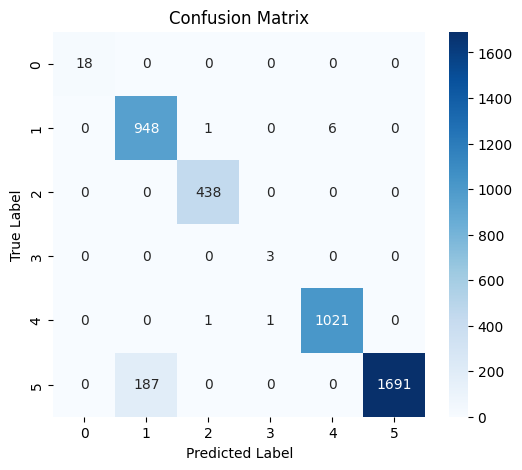

📌 Best Parameters: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 200}
📌 Cross-Validation Score (Best F1-Score from CV): 0.9327
📌 Train F1-Score: 0.9554

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.84      0.99      0.91       955
           2       1.00      1.00      1.00       438
           3       0.75      1.00      0.86         3
           4       0.99      1.00      1.00      1023
           5       1.00      0.90      0.95      1878

    accuracy                           0.95      4315
   macro avg       0.93      0.98      0.95      4315
weighted avg       0.96      0.95      0.96      4315


📌 F1-Score ของแต่ละรอบจาก Cross-Validation:
  - Fold 1: 0.9232
  - Fold 2: 0.9356
  - Fold 3: 0.9431
  - Fold 4: 0.9303
  - Fold 5: 0.9316


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว
df = train_set_pre  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                     'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                     'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']
X_train = df[selected_features]
y_train = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [150, 200, 300],        # เพิ่มจำนวน estimators
    'max_depth': [6, 8, 10],                 # ลด max_depth
    'min_samples_split': [7, 8],              # เพิ่ม min_samples_split
    'min_samples_leaf': [4, 5],               # เพิ่ม min_samples_leaf
    'bootstrap': [False],                     # ใช้ False เพื่อป้องกัน overfitting
    'class_weight': ['balanced_subsample']    # ใช้ balanced_subsample แทน balanced
}

# 🎯 4. ใช้ Stratified K-Fold เพื่อให้แต่ละ Fold มีสัดส่วนของ class เท่ากัน
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🎯 5. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 🎯 6. ดึง Best Parameters และค่า CV Scores
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_
cv_results = grid_search.cv_results_  # ดึงผลลัพธ์ทั้งหมดของ CV

# 🎯 7. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 🎯 8. แสดง Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🎯 9. แสดง Classification Report
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# 🎯 10. แสดงค่า F1-Score ของแต่ละรอบจาก Cross-Validation
print("\n📌 F1-Score ของแต่ละรอบจาก Cross-Validation:")
for i in range(5):  # มีทั้งหมด 5 fold
    print(f"  - Fold {i+1}: {round(cv_results['split'+str(i)+'_test_score'][grid_search.best_index_], 4)}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# 1. ใช้ชุดข้อมูลเดิม
df = train_set_pre  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 2. แสดงสัดส่วนของแต่ละคลาส
print("Class distribution:")
print(df['Thal_Group'].value_counts())

# 3. ใช้ feature ทั้งหมดตามที่กำหนด
selected_features = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                   'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                   'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']

# 4. แบ่งข้อมูล
X_train = df[selected_features]
y_train = df['Thal_Group']

# 5. สร้าง pipeline โดยใช้ StandardScaler และ RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 6. ปรับแต่งพารามิเตอร์ให้เหมาะสมกับข้อมูลไม่สมดุล
param_grid = {
    'classifier__n_estimators': [300, 500, 700],
    'classifier__max_depth': [10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 7],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': ['balanced', 'balanced_subsample', {0: 5, 1: 1, 2: 1, 3: 10, 4: 1, 5: 1}],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False]
}

# 7. กำหนด Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 8. ทำ GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_weighted',
                          n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 9. ดึงผลลัพธ์
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_
cv_results = grid_search.cv_results_

# 10. ทำนายบนข้อมูลฝึกฝน
y_pred = best_model.predict(X_train)
f1 = f1_score(y_train, y_pred, average='weighted')

# 11. สร้าง Feature Importance Plot
feature_importance = best_model.named_steps['classifier'].feature_importances_
feature_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# 12. ทำการทดลองสร้างโมเดลใหม่ด้วย feature ที่สำคัญที่สุด
top_features = feature_df.head(10)['Feature'].tolist()
print("Top 10 features:", top_features)

X_train_top = X_train[top_features]
best_clf = RandomForestClassifier(**{k.replace('classifier__', ''): v for k, v in best_params.items()})
best_clf.fit(X_train_top, y_train)
y_pred_top = best_clf.predict(X_train_top)
f1_top = f1_score(y_train, y_pred_top, average='weighted')

print("\n📌 F1-Score with top 10 features:", round(f1_top, 4))

# 13. แสดง Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=sorted(y_train.unique()),
           yticklabels=sorted(y_train.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 14. สร้าง Threshold Adjustment สำหรับคลาสที่มีข้อมูลน้อย
# ดึง probability จากโมเดลหลัก
y_proba = best_model.predict_proba(X_train)

# ปรับ threshold สำหรับคลาสที่มีข้อมูลน้อย (คลาส 3)
custom_threshold = 0.3  # ค่า threshold ที่ต่ำกว่าปกติสำหรับคลาส 3
y_pred_adjusted = np.copy(y_pred)

for i in range(len(y_train)):
    if y_proba[i, 3] > custom_threshold:  # ถ้าความน่าจะเป็นของคลาส 3 สูงกว่า threshold
        y_pred_adjusted[i] = 3

f1_adjusted = f1_score(y_train, y_pred_adjusted, average='weighted')
print("\n📌 F1-Score with threshold adjustment:", round(f1_adjusted, 4))

# 15. แสดงผลลัพธ์ที่สำคัญ
print("\n📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1, 4))
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# 16. แสดงค่า F1-Score ของแต่ละรอบจาก Cross-Validation
print("\n📌 F1-Score ของแต่ละรอบจาก Cross-Validation:")
for i in range(5):
    print(f"  - Fold {i+1}: {round(cv_results['split'+str(i)+'_test_score'][grid_search.best_index_], 4)}")



Class distribution:
Thal_Group
5    1878
4    1023
1     955
2     438
0      18
3       3
Name: count, dtype: int64
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 



---



# model จริง

## RandomForest

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


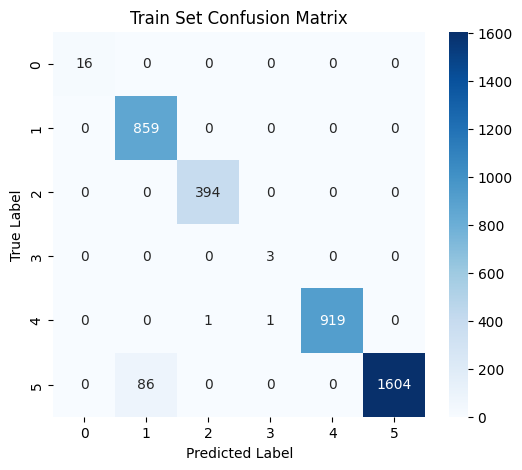

📌 Best Parameters: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
📌 Cross-Validation Score (Best F1-Score from CV): 0.9327
📌 Train F1-Score: 0.9776

Classification Report (Train Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      1.00      0.95       859
           2       1.00      1.00      1.00       394
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00       921
           5       1.00      0.95      0.97      1690

    accuracy                           0.98      3883
   macro avg       0.94      0.99      0.96      3883
weighted avg       0.98      0.98      0.98      3883



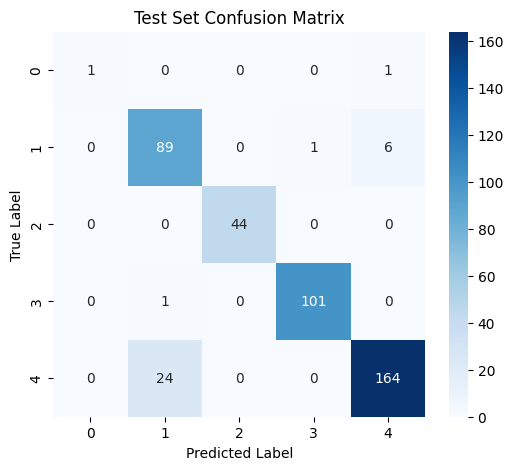

📌 Test F1-Score: 0.9247

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.78      0.93      0.85        96
           2       1.00      1.00      1.00        44
           4       0.99      0.99      0.99       102
           5       0.96      0.87      0.91       188

    accuracy                           0.92       432
   macro avg       0.95      0.86      0.88       432
weighted avg       0.93      0.92      0.92       432


📌 F1-Score ของแต่ละรอบจาก Cross-Validation:
  - Fold 1: 0.932
  - Fold 2: 0.9372
  - Fold 3: 0.9368
  - Fold 4: 0.9378
  - Fold 5: 0.9198


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# 🎯 1. กำหนดชุดข้อมูลที่มีอยู่แล้ว
df = train_set_pre  # ใช้ชุดข้อมูลที่แบ่งมาให้แล้ว

# 🎯 2. เลือกฟีเจอร์ที่สำคัญ
selected_features = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                     'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                     'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']
X = df[selected_features]
y = df['Thal_Group']  # เปลี่ยนเป็น target ที่เหมาะสม

# 🎯 3. แบ่งข้อมูลเป็น Train และ Test set (90% Train, 10% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# 🎯 4. กำหนดพารามิเตอร์ที่ต้องการ Tune
param_grid = {
    'n_estimators': [100, 150],          # เพิ่มจำนวน estimators
    'max_depth': [5, 10, 12],            # ลด max_depth ลง
    'min_samples_split': [5, 10],         # ป้องกันการแตก node มากเกินไป
    'min_samples_leaf': [3, 4],           # ให้มีตัวอย่างใน leaf มากขึ้น
    'bootstrap': [True, False],           # ทดสอบ bootstrap
    'class_weight': ['balanced_subsample']  # ปรับสมดุล class อัตโนมัติ
}

# 🎯 5. ใช้ Stratified K-Fold เพื่อให้แต่ละ Fold มีสัดส่วนของ class เท่ากัน
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🎯 6. ใช้ GridSearchCV หา Best Parameters ด้วย Cross-Validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 🎯 7. ดึง Best Parameters และค่า CV Scores
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_score = grid_search.best_score_
cv_results = grid_search.cv_results_  # ดึงผลลัพธ์ทั้งหมดของ CV

# 🎯 8. ทำนายจาก Train Set เดิม เพื่อดู Performance
y_train_pred = best_model.predict(X_train)
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# 🎯 9. แสดง Confusion Matrix ของ Train Set
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Train Set Confusion Matrix")
plt.show()

# 🎯 10. แสดง Classification Report ของ Train Set
print("📌 Best Parameters:", best_params)
print("📌 Cross-Validation Score (Best F1-Score from CV):", round(cv_score, 4))
print("📌 Train F1-Score:", round(f1_train, 4))
print("\nClassification Report (Train Set):\n", classification_report(y_train, y_train_pred))

# 🎯 11. ทำนายผลจาก Test Set
y_test_pred = best_model.predict(X_test)

# 🎯 12. คำนวณ F1-Score สำหรับ Test Set
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# 🎯 13. แสดง Confusion Matrix สำหรับ Test Set
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Test Set Confusion Matrix")
plt.show()

# 🎯 14. แสดง Classification Report สำหรับ Test Set
print("📌 Test F1-Score:", round(f1_test, 4))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# 🎯 15. แสดงค่า F1-Score ของแต่ละรอบจาก Cross-Validation
print("\n📌 F1-Score ของแต่ละรอบจาก Cross-Validation:")
for i in range(5):
    print(f"  - Fold {i+1}: {round(cv_results['split'+str(i)+'_test_score'][grid_search.best_index_], 4)}")



## XGboots - SMOTE

[I 2025-03-08 14:58:17,023] A new study created in memory with name: no-name-6ec87d0f-81c4-4f0a-9cdf-5474103ae03e


📌 Train: (3883, 15) 📌 Validation: (432, 15)
Thal_Group
5    1690
4     921
1     859
2     394
0      16
3       3
Name: count, dtype: int64
Thal_Group
5    1690
4    1690
1    1690
2    1690
0    1690
3    1690
Name: count, dtype: int64


<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9797


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9827


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9817


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:58:42,842] Trial 0 finished with value: 0.9786547081788555 and parameters: {'n_estimators': 473, 'max_depth': 10, 'learning_rate': 0.06944510689487877, 'subsample': 0.6025825773006983, 'colsample_bytree': 0.9204516587859, 'gamma': 0.005409043813503516, 'scale_pos_weight': 1.5625521892279164}. Best is trial 0 with value: 0.9786547081788555.


📌 Fold 5: 0.9714

📌 Cross-Validation Score (mean): 0.9787



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9763


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9812


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9827


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9792


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:58:53,110] Trial 1 finished with value: 0.978062144665589 and parameters: {'n_estimators': 106, 'max_depth': 11, 'learning_rate': 0.07974447080190644, 'subsample': 0.694581272193526, 'colsample_bytree': 0.6960551819236998, 'gamma': 0.00013454937053939667, 'scale_pos_weight': 0.4532721652666608}. Best is trial 0 with value: 0.9786547081788555.


📌 Fold 5: 0.9709

📌 Cross-Validation Score (mean): 0.9781



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9808


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9807


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:59:10,116] Trial 2 finished with value: 0.9775849317032883 and parameters: {'n_estimators': 454, 'max_depth': 3, 'learning_rate': 0.14534406873691455, 'subsample': 0.6889918637550774, 'colsample_bytree': 0.6931894361232036, 'gamma': 0.00016387775683207763, 'scale_pos_weight': 0.3936888932753996}. Best is trial 0 with value: 0.9786547081788555.


📌 Fold 5: 0.9709

📌 Cross-Validation Score (mean): 0.9776



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9737


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9763


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9802


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:59:22,371] Trial 3 finished with value: 0.9756690985126758 and parameters: {'n_estimators': 210, 'max_depth': 5, 'learning_rate': 0.028252445117352247, 'subsample': 0.7965949584743808, 'colsample_bytree': 0.7743335800974346, 'gamma': 0.0022137276451411883, 'scale_pos_weight': 0.3061913467711297}. Best is trial 0 with value: 0.9786547081788555.


📌 Fold 5: 0.9693

📌 Cross-Validation Score (mean): 0.9757



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9783


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9802


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9847


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:59:50,041] Trial 4 finished with value: 0.9788567618565889 and parameters: {'n_estimators': 422, 'max_depth': 9, 'learning_rate': 0.04253213320613486, 'subsample': 0.9512851121687204, 'colsample_bytree': 0.8111964548508814, 'gamma': 0.0008047887158278405, 'scale_pos_weight': 0.19561240621441173}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9689

📌 Cross-Validation Score (mean): 0.9789



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9733


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9812


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9807


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:00:15,943] Trial 5 finished with value: 0.9777600277437346 and parameters: {'n_estimators': 245, 'max_depth': 11, 'learning_rate': 0.020407913381598038, 'subsample': 0.7280222999938538, 'colsample_bytree': 0.7359880227247757, 'gamma': 0.0018130652177270278, 'scale_pos_weight': 0.14988344150915953}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9713

📌 Cross-Validation Score (mean): 0.9778



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9728


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9788


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9812


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:00:28,279] Trial 6 finished with value: 0.9760684825439423 and parameters: {'n_estimators': 106, 'max_depth': 11, 'learning_rate': 0.02339952067047092, 'subsample': 0.7441697830906279, 'colsample_bytree': 0.6396033041785271, 'gamma': 0.06307944271936466, 'scale_pos_weight': 2.276445030652695}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9693

📌 Cross-Validation Score (mean): 0.9761



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9783


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9817


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9832


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:00:38,888] Trial 7 finished with value: 0.9786596608054587 and parameters: {'n_estimators': 214, 'max_depth': 8, 'learning_rate': 0.14007889995333048, 'subsample': 0.6811371241761206, 'colsample_bytree': 0.612959434779893, 'gamma': 0.07255557056867726, 'scale_pos_weight': 0.6928944463690003}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9714

📌 Cross-Validation Score (mean): 0.9787



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9798


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9803


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:00:52,718] Trial 8 finished with value: 0.9782721012608849 and parameters: {'n_estimators': 354, 'max_depth': 5, 'learning_rate': 0.14861855605336474, 'subsample': 0.7072353288801715, 'colsample_bytree': 0.7395652337778167, 'gamma': 0.017992120967034207, 'scale_pos_weight': 8.667025002561164}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9713

📌 Cross-Validation Score (mean): 0.9783



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9753


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9773


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9817


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9807


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:01:14,061] Trial 9 finished with value: 0.9770651530921916 and parameters: {'n_estimators': 360, 'max_depth': 6, 'learning_rate': 0.01954606333307102, 'subsample': 0.7402767036947656, 'colsample_bytree': 0.8026370411013721, 'gamma': 0.022449995838328893, 'scale_pos_weight': 7.127602101269882}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9703

📌 Cross-Validation Score (mean): 0.9771



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9747


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9768


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9827


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9792


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:01:51,339] Trial 10 finished with value: 0.9764560202603846 and parameters: {'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.01046599914450698, 'subsample': 0.9890213758960615, 'colsample_bytree': 0.8791760289327413, 'gamma': 0.0007356463345392525, 'scale_pos_weight': 0.12893507907757654}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9688

📌 Cross-Validation Score (mean): 0.9765



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9783


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9797


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9818


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:02:03,332] Trial 11 finished with value: 0.9784669378640263 and parameters: {'n_estimators': 277, 'max_depth': 8, 'learning_rate': 0.27122939256022033, 'subsample': 0.9490665141114734, 'colsample_bytree': 0.9870326767320482, 'gamma': 0.0005413986773974494, 'scale_pos_weight': 0.7875721526411606}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9704

📌 Cross-Validation Score (mean): 0.9785



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9773


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9813


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9797


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:02:20,117] Trial 12 finished with value: 0.9781633789739373 and parameters: {'n_estimators': 185, 'max_depth': 9, 'learning_rate': 0.04695528507038134, 'subsample': 0.8895800968681116, 'colsample_bytree': 0.6034635453576317, 'gamma': 0.08947872086328218, 'scale_pos_weight': 0.2426567926437009}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9704

📌 Cross-Validation Score (mean): 0.9782



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9773


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9817


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9798


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:02:34,881] Trial 13 finished with value: 0.9782697869227714 and parameters: {'n_estimators': 322, 'max_depth': 7, 'learning_rate': 0.1282786615785775, 'subsample': 0.8740070460759493, 'colsample_bytree': 0.8486770317490534, 'gamma': 0.008269915225123358, 'scale_pos_weight': 0.8346811633684075}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9704

📌 Cross-Validation Score (mean): 0.9783



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9763


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9807


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9842


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9812


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:03:01,563] Trial 14 finished with value: 0.9785592330255561 and parameters: {'n_estimators': 417, 'max_depth': 9, 'learning_rate': 0.04669492638867582, 'subsample': 0.6082990512403277, 'colsample_bytree': 0.8243851063290986, 'gamma': 0.0006303841645565522, 'scale_pos_weight': 2.882876453874506}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9704

📌 Cross-Validation Score (mean): 0.9786



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9802


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9783


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9832


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9788


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:03:10,303] Trial 15 finished with value: 0.9784622661994428 and parameters: {'n_estimators': 174, 'max_depth': 7, 'learning_rate': 0.2648629904558907, 'subsample': 0.8427035603756677, 'colsample_bytree': 0.8973927698218853, 'gamma': 0.02364528949784448, 'scale_pos_weight': 0.18280736280194254}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9718

📌 Cross-Validation Score (mean): 0.9785



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9773


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9802


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9813


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:03:26,406] Trial 16 finished with value: 0.9779683335356208 and parameters: {'n_estimators': 284, 'max_depth': 9, 'learning_rate': 0.09840860239030984, 'subsample': 0.7965949741490845, 'colsample_bytree': 0.9474770897068328, 'gamma': 0.000378456423347375, 'scale_pos_weight': 0.5739615023679986}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9689

📌 Cross-Validation Score (mean): 0.978



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9763


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9803


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9832


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:03:43,907] Trial 17 finished with value: 0.9778617397270949 and parameters: {'n_estimators': 236, 'max_depth': 8, 'learning_rate': 0.03627370318571748, 'subsample': 0.6520607001405723, 'colsample_bytree': 0.6624871567111723, 'gamma': 0.0013477923697536402, 'scale_pos_weight': 0.10547388964877334}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9708

📌 Cross-Validation Score (mean): 0.9779



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9797


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9808


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9822


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9817


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:03:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:04:02,004] Trial 18 finished with value: 0.9786678777118152 and parameters: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1992877856847726, 'subsample': 0.9393034794268127, 'colsample_bytree': 0.768309511904476, 'gamma': 0.005007114280236534, 'scale_pos_weight': 1.6560337339721005}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9689

📌 Cross-Validation Score (mean): 0.9787



<ipython-input-44-00c53feffc5d>:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-44-00c53feffc5d>:40: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-44-00c53feffc5d>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9762


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:04:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9803


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:04:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9832


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:04:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9812


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:04:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 15:04:48,687] Trial 19 finished with value: 0.9780587926852414 and parameters: {'n_estimators': 477, 'max_depth': 10, 'learning_rate': 0.011480316786505582, 'subsample': 0.9993414337081833, 'colsample_bytree': 0.7687019025538636, 'gamma': 0.0038766450810837337, 'scale_pos_weight': 4.548961210663708}. Best is trial 4 with value: 0.9788567618565889.


📌 Fold 5: 0.9694

📌 Cross-Validation Score (mean): 0.9781



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:04:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Validation F1-Score: 0.9291


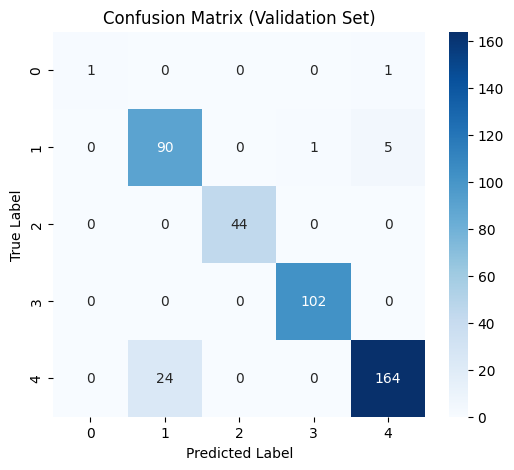

📌 Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.79      0.94      0.86        96
           2       1.00      1.00      1.00        44
           4       0.99      1.00      1.00       102
           5       0.96      0.87      0.92       188

    accuracy                           0.93       432
   macro avg       0.95      0.86      0.89       432
weighted avg       0.94      0.93      0.93       432

📌 Best Hyperparameters from Optuna:
{'n_estimators': 422, 'max_depth': 9, 'learning_rate': 0.04253213320613486, 'subsample': 0.9512851121687204, 'colsample_bytree': 0.8111964548508814, 'gamma': 0.0008047887158278405, 'scale_pos_weight': 0.19561240621441173}


In [ ]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ✅ 1. โหลดและเตรียมข้อมูล
feature_cols = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']

X_train = train_set_pre.loc[:, feature_cols]
y_train = train_set_pre['Thal_Group']

# ✅ 1. แบ่ง Train/Validation (90/10)
X_train, X_val, y_train, y_val = train_test_split(train_set_pre[feature_cols], train_set_pre['Thal_Group'],
                                                  test_size=0.1, random_state=42, stratify=train_set_pre['Thal_Group'])

print("📌 Train:", X_train.shape, "📌 Validation:", X_val.shape)

# ✅ 2. จัดการ Imbalanced Data ด้วย SMOTE
print(y_train.value_counts())
#ใช้ SMOTE เฉพาะกับชุด Train
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())

# ✅ 3. ฟังก์ชัน Optuna เพื่อ Tune Hyperparameters ของ XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 0.1, 10)
    }

    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    f1_scores = []  # เก็บค่า F1-Score ของแต่ละ Fold
    for fold, (train_idx, valid_idx) in enumerate(skf.split(X_train_resampled, y_train_resampled), 1):
        X_fold_train, X_fold_valid = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[valid_idx]

        model.fit(X_fold_train, y_fold_train)
        y_fold_pred = model.predict(X_fold_valid)
        f1 = f1_score(y_fold_valid, y_fold_pred, average='weighted')
        f1_scores.append(f1)

        print(f"📌 Fold {fold}: {round(f1, 4)}")

    mean_f1 = np.mean(f1_scores)
    print(f"\n📌 Cross-Validation Score (mean): {round(mean_f1, 4)}\n")

    return mean_f1

# ✅ 4. รัน Optuna เพื่อหา Hyperparameters ที่ดีที่สุด
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

# ✅ 5. เทรนโมเดลด้วยค่าพารามิเตอร์ที่ดีที่สุด
best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_resampled, y_train_resampled)

# ✅ 6. ประเมินผลลัพธ์
# ✅ 4. ทดสอบบนชุด Validation
y_val_pred = best_model.predict(X_val)
f1_val = f1_score(y_val, y_val_pred, average='weighted')
print("📌 Validation F1-Score:", round(f1_val, 4))

# ✅ 6. แสดง Confusion Matrix ของชุด Validation
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# ✅ 6. แสดง Classification Report ของชุด Validation
print("📌 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# ✅ 8. สรุปค่าพารามิเตอร์ที่ดีที่สุด
print("📌 Best Hyperparameters from Optuna:")
print(best_params)

## randomforest - SMOTE - เลือกโมเดลนี้

[I 2025-03-08 15:09:46,014] A new study created in memory with name: no-name-6145ab18-fb3f-4980-a75c-fe7152b370ac


📌 Train: (3883, 15) 📌 Validation: (432, 15)
Thal_Group
5    1690
4     921
1     859
2     394
0      16
3       3
Name: count, dtype: int64
Thal_Group
5    1690
4    1690
1    1690
2    1690
0    1690
3    1690
Name: count, dtype: int64
📌 Fold 1: 0.9733
📌 Fold 2: 0.9772
📌 Fold 3: 0.9767
📌 Fold 4: 0.9757


[I 2025-03-08 15:11:38,121] Trial 0 finished with value: 0.974373831260922 and parameters: {'n_estimators': 381, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9688

📌 Cross-Validation Score (mean): 0.9744

📌 Fold 1: 0.9669
📌 Fold 2: 0.9699
📌 Fold 3: 0.9714
📌 Fold 4: 0.9679


[I 2025-03-08 15:13:17,429] Trial 1 finished with value: 0.9679904851293853 and parameters: {'n_estimators': 376, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9639

📌 Cross-Validation Score (mean): 0.968

📌 Fold 1: 0.7884
📌 Fold 2: 0.7964
📌 Fold 3: 0.7955
📌 Fold 4: 0.7946


[I 2025-03-08 15:14:12,109] Trial 2 finished with value: 0.792713244110417 and parameters: {'n_estimators': 240, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.7887

📌 Cross-Validation Score (mean): 0.7927

📌 Fold 1: 0.9718
📌 Fold 2: 0.9758
📌 Fold 3: 0.9787
📌 Fold 4: 0.9753


[I 2025-03-08 15:14:45,826] Trial 3 finished with value: 0.9737953830251275 and parameters: {'n_estimators': 375, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9673

📌 Cross-Validation Score (mean): 0.9738

📌 Fold 1: 0.908
📌 Fold 2: 0.9127
📌 Fold 3: 0.9172
📌 Fold 4: 0.9147


[I 2025-03-08 15:14:59,397] Trial 4 finished with value: 0.9136664091811462 and parameters: {'n_estimators': 304, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9157

📌 Cross-Validation Score (mean): 0.9137

📌 Fold 1: 0.9513
📌 Fold 2: 0.9456
📌 Fold 3: 0.9562
📌 Fold 4: 0.9468


[I 2025-03-08 15:15:12,127] Trial 5 finished with value: 0.9503687715179405 and parameters: {'n_estimators': 152, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9519

📌 Cross-Validation Score (mean): 0.9504

📌 Fold 1: 0.9668
📌 Fold 2: 0.9738
📌 Fold 3: 0.9752
📌 Fold 4: 0.9718


[I 2025-03-08 15:15:25,139] Trial 6 finished with value: 0.9705014541755765 and parameters: {'n_estimators': 126, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9649

📌 Cross-Validation Score (mean): 0.9705

📌 Fold 1: 0.9678
📌 Fold 2: 0.9758
📌 Fold 3: 0.9763
📌 Fold 4: 0.9723


[I 2025-03-08 15:16:17,461] Trial 7 finished with value: 0.971188012845315 and parameters: {'n_estimators': 477, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9638

📌 Cross-Validation Score (mean): 0.9712

📌 Fold 1: 0.9602
📌 Fold 2: 0.9655
📌 Fold 3: 0.9627
📌 Fold 4: 0.9587


[I 2025-03-08 15:18:14,310] Trial 8 finished with value: 0.960071067801713 and parameters: {'n_estimators': 274, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9533

📌 Cross-Validation Score (mean): 0.9601

📌 Fold 1: 0.9698
📌 Fold 2: 0.9758
📌 Fold 3: 0.9792
📌 Fold 4: 0.9723


[I 2025-03-08 15:18:42,546] Trial 9 finished with value: 0.9726964832760636 and parameters: {'n_estimators': 331, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9663

📌 Cross-Validation Score (mean): 0.9727

📌 Fold 1: 0.9733
📌 Fold 2: 0.9777
📌 Fold 3: 0.9763
📌 Fold 4: 0.9753


[I 2025-03-08 15:21:14,211] Trial 10 finished with value: 0.9740828185226909 and parameters: {'n_estimators': 499, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9678

📌 Cross-Validation Score (mean): 0.9741

📌 Fold 1: 0.9733
📌 Fold 2: 0.9777
📌 Fold 3: 0.9763
📌 Fold 4: 0.9753


[I 2025-03-08 15:23:42,961] Trial 11 finished with value: 0.9740828185226909 and parameters: {'n_estimators': 496, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9678

📌 Cross-Validation Score (mean): 0.9741

📌 Fold 1: 0.9703
📌 Fold 2: 0.9748
📌 Fold 3: 0.9753
📌 Fold 4: 0.9729


[I 2025-03-08 15:25:49,742] Trial 12 finished with value: 0.9722124230440695 and parameters: {'n_estimators': 429, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9678

📌 Cross-Validation Score (mean): 0.9722

📌 Fold 1: 0.9723
📌 Fold 2: 0.9739
📌 Fold 3: 0.9748
📌 Fold 4: 0.9733


[I 2025-03-08 15:27:55,357] Trial 13 finished with value: 0.9721337064064585 and parameters: {'n_estimators': 430, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9664

📌 Cross-Validation Score (mean): 0.9721

📌 Fold 1: 0.9703
📌 Fold 2: 0.9753
📌 Fold 3: 0.9757
📌 Fold 4: 0.9743


[I 2025-03-08 15:30:01,407] Trial 14 finished with value: 0.9728033181572648 and parameters: {'n_estimators': 428, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.974373831260922.


📌 Fold 5: 0.9683

📌 Cross-Validation Score (mean): 0.9728

📌 Fold 1: 0.9728
📌 Fold 2: 0.9787
📌 Fold 3: 0.9777
📌 Fold 4: 0.9777


[I 2025-03-08 15:31:06,319] Trial 15 finished with value: 0.9753657869490177 and parameters: {'n_estimators': 209, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 15 with value: 0.9753657869490177.


📌 Fold 5: 0.9698

📌 Cross-Validation Score (mean): 0.9754

📌 Fold 1: 0.9708
📌 Fold 2: 0.9778
📌 Fold 3: 0.9797
📌 Fold 4: 0.9758


[I 2025-03-08 15:31:21,766] Trial 16 finished with value: 0.9740832527351252 and parameters: {'n_estimators': 178, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 15 with value: 0.9753657869490177.


📌 Fold 5: 0.9663

📌 Cross-Validation Score (mean): 0.9741

📌 Fold 1: 0.9718
📌 Fold 2: 0.9782
📌 Fold 3: 0.9782
📌 Fold 4: 0.9762


[I 2025-03-08 15:32:30,138] Trial 17 finished with value: 0.9749700588224283 and parameters: {'n_estimators': 225, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 15 with value: 0.9753657869490177.


📌 Fold 5: 0.9703

📌 Cross-Validation Score (mean): 0.975

📌 Fold 1: 0.9622
📌 Fold 2: 0.9647
📌 Fold 3: 0.9698
📌 Fold 4: 0.9648


[I 2025-03-08 15:33:26,318] Trial 18 finished with value: 0.9646758293491207 and parameters: {'n_estimators': 214, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 15 with value: 0.9753657869490177.


📌 Fold 5: 0.9619

📌 Cross-Validation Score (mean): 0.9647

📌 Fold 1: 0.9728
📌 Fold 2: 0.9763
📌 Fold 3: 0.9792
📌 Fold 4: 0.9758


[I 2025-03-08 15:33:45,208] Trial 19 finished with value: 0.9740951993535086 and parameters: {'n_estimators': 201, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 15 with value: 0.9753657869490177.


📌 Fold 5: 0.9663

📌 Cross-Validation Score (mean): 0.9741

📌 Validation F1-Score: 0.934


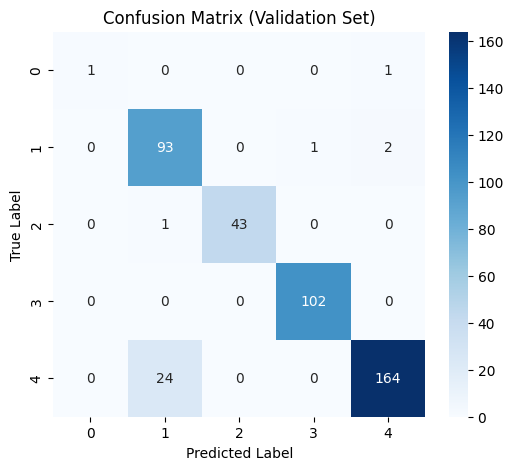

📌 Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.79      0.97      0.87        96
           2       1.00      0.98      0.99        44
           4       0.99      1.00      1.00       102
           5       0.98      0.87      0.92       188

    accuracy                           0.93       432
   macro avg       0.95      0.86      0.89       432
weighted avg       0.94      0.93      0.93       432

📌 Best Hyperparameters from Optuna:
{'n_estimators': 209, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}


In [ ]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ✅ 1. โหลดและเตรียมข้อมูล
feature_cols = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']

X_train = train_set_pre.loc[:, feature_cols]
y_train = train_set_pre['Thal_Group']

# ✅ 1. แบ่ง Train/Validation (90/10)
X_train, X_val, y_train, y_val = train_test_split(train_set_pre[feature_cols], train_set_pre['Thal_Group'],
                                                  test_size=0.1, random_state=42, stratify=train_set_pre['Thal_Group'])

print("📌 Train:", X_train.shape, "📌 Validation:", X_val.shape)

# ✅ 2. จัดการ Imbalanced Data ด้วย SMOTE
print(y_train.value_counts())
#ใช้ SMOTE เฉพาะกับชุด Train
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())

# ✅ 3. ฟังก์ชัน Optuna เพื่อ Tune Hyperparameters ของ RandomForest
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    model = RandomForestClassifier(**params, random_state=42)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    f1_scores = []  # เก็บค่า F1-Score ของแต่ละ Fold
    for fold, (train_idx, valid_idx) in enumerate(skf.split(X_train_resampled, y_train_resampled), 1):
        X_fold_train, X_fold_valid = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[valid_idx]

        model.fit(X_fold_train, y_fold_train)
        y_fold_pred = model.predict(X_fold_valid)
        f1 = f1_score(y_fold_valid, y_fold_pred, average='weighted')
        f1_scores.append(f1)

        print(f"📌 Fold {fold}: {round(f1, 4)}")

    mean_f1 = np.mean(f1_scores)
    print(f"\n📌 Cross-Validation Score (mean): {round(mean_f1, 4)}\n")

    return mean_f1

# ✅ 4. รัน Optuna เพื่อหา Hyperparameters ที่ดีที่สุด
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

# ✅ 5. เทรนโมเดลด้วยค่าพารามิเตอร์ที่ดีที่สุด
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# ✅ 6. ประเมินผลลัพธ์
# ✅ 4. ทดสอบบนชุด Validation
y_val_pred = best_model.predict(X_val)
f1_val = f1_score(y_val, y_val_pred, average='weighted')
print("📌 Validation F1-Score:", round(f1_val, 4))

# ✅ 6. แสดง Confusion Matrix ของชุด Validation
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# ✅ 6. แสดง Classification Report ของชุด Validation
print("📌 Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# ✅ 8. สรุปค่าพารามิเตอร์ที่ดีที่สุด
print("📌 Best Hyperparameters from Optuna:")
print(best_params)


# Test

In [ ]:
# ตรวจสอบฟีเจอร์ใน X_test ที่ใช้ในการทำนาย
X_test = X_test[feature_cols]  # ใช้ฟีเจอร์ที่ตรงกับที่ใช้ในการฝึกโมเดล

# ✅ 9. ทำนายผลลัพธ์บนชุดทดสอบ (X_test)
y_test_pred = best_model.predict(X_test)

# ✅ 10. แสดงผลการทำนายบนชุด X_test
print("Predictions for X_test:\n", y_test_pred)

Predictions for X_test:
 [5 5 5 ... 0 0 4]


In [ ]:
y_test_pred

array([5, 5, 5, ..., 0, 0, 4])

In [ ]:
# แปลง y_test_pred เป็น DataFrame
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['Predicted_Thal_Group'])

In [ ]:
y_test_pred_df

,Predicted_Thal_Group
0,5
1,5
2,5
3,5
4,5
...,...
1992,1
1993,0
1994,0
1995,0


In [ ]:
# กำหนด dictionary สำหรับการ map ค่า
thal_group_mapping = {
    0: 'Abnormal_variants',
    1: 'Alpha_thal_related',
    2: 'Beta_thal_related',
    3: 'Complex_genotypes',
    4: 'HbE_related',
    5: 'Normal'
}

# ทำการ map ค่าจาก y_test_pred_df
y_test_pred_df['Predicted_Thal_Group'] = y_test_pred_df['Predicted_Thal_Group'].map(thal_group_mapping)

In [ ]:
y_test_pred_df

,Predicted_Thal_Group
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
1992,Alpha_thal_related
1993,Abnormal_variants
1994,Abnormal_variants
1995,Abnormal_variants


In [ ]:
y_test_pred_df['Predicted_Thal_Group'].value_counts()

,count
Predicted_Thal_Group,
Normal,781
Alpha_thal_related,510
HbE_related,483
Beta_thal_related,202
Complex_genotypes,11
Abnormal_variants,10


In [ ]:
# prompt: save y_test_pred_df to csv  on my drive

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save the DataFrame to a CSV file in your Google Drive
file_path = '/content/drive/MyDrive/y_test_pred.csv' # Change the path if needed
y_test_pred_df.to_csv(file_path, index=False)  # Set index=False to avoid saving the index

print(f"DataFrame saved to: {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame saved to: /content/drive/MyDrive/y_test_pred.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

''''
# 🎯 2. เลือกฟีเจอร์ที่สำคัญที่ใช้ในการทำนาย
X_test_selected = X_test[selected_features]

# 🎯 3. ทำนายผลกับข้อมูล X_test
y_test_pred = best_model.predict(X_test_selected)

# 🎯 4. แสดงผลการทำนาย
print("Predictions for X_test:\n", y_test_pred)
''''

Predictions for X_test:
 [5 5 5 ... 5 0 4]


In [ ]:
# 17. ทดสอบกับข้อมูลที่ไม่เคยเห็น (ถ้ามี)
if 'test_set_pre' in globals():
    test_set = test_set_pre
    X_test = test_set[selected_features]
    y_test = test_set['Thal_Group']

    # ทำนายบนข้อมูลทดสอบ
    y_test_pred = best_model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print("\n📌 Test F1-Score:", round(test_f1, 4))
    print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

    # ทดลองใช้ threshold adjustment กับข้อมูลทดสอบ
    y_test_proba = best_model.predict_proba(X_test)
    y_test_pred_adjusted = np.copy(y_test_pred)

    for i in range(len(y_test)):
        if y_test_proba[i, 3] > custom_threshold:
            y_test_pred_adjusted[i] = 3

    test_f1_adjusted = f1_score(y_test, y_test_pred_adjusted, average='weighted')
    print("\n📌 Test F1-Score with threshold adjustment:", round(test_f1_adjusted, 4))

In [ ]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ✅ 1. โหลดและเตรียมข้อมูล
feature_cols = ['Xn', 'Hb(Gm%)', 'Hct(%)', 'MCV(fl)', 'A2 (2-3%)', 'HbF (2%)',
                'HbA (95-97%)', 'RBC', 'MCH', 'MCHC', 'MCV-RBC-3*HGB',
                'MCV-RBC-5*HGB', '|80-MCV|', '|27-MCH|', '|80-MCV|*|27-MCH|']

X_train = train_set_pre.loc[:, feature_cols]
y_train = train_set_pre['Thal_Group']

# ✅ 2. จัดการ Imbalanced Data ด้วย SMOTE
print(y_train.value_counts())
# ใช้ SMOTE เฉพาะกับชุด Train
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())

# ✅ 3. ฟังก์ชัน Optuna เพื่อ Tune Hyperparameters ของ XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 0.1, 10)
    }

    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    f1_scores = []  # เก็บค่า F1-Score ของแต่ละ Fold
    for fold, (train_idx, valid_idx) in enumerate(skf.split(X_train_resampled, y_train_resampled), 1):
        X_fold_train, X_fold_valid = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[valid_idx]
        y_fold_train, y_fold_valid = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[valid_idx]

        model.fit(X_fold_train, y_fold_train)
        y_fold_pred = model.predict(X_fold_valid)
        f1 = f1_score(y_fold_valid, y_fold_pred, average='weighted')
        f1_scores.append(f1)

        print(f"📌 Fold {fold}: {round(f1, 4)}")

    mean_f1 = np.mean(f1_scores)
    print(f"\n📌 Cross-Validation Score (mean): {round(mean_f1, 4)}\n")

    return mean_f1

# ✅ 4. รัน Optuna เพื่อหา Hyperparameters ที่ดีที่สุด
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

# ✅ 5. เทรนโมเดลด้วยค่าพารามิเตอร์ที่ดีที่สุด
best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_resampled, y_train_resampled)

# ✅ 6. ประเมินผลลัพธ์
# ✅ 4. ทดสอบบนชุด Validation
y_val_pred = best_model.predict(X_val)
f1_val = f1_score(y_val, y_val_pred, average='weighted')
print("📌 Validation F1-Score:", round(f1_val, 4))

# ✅ 5. ทดสอบบนชุด Test (ใช้ X_test จากไฟล์ที่โหลดมา)


y_test_pred = best_model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print("📌 Test F1-Score:", round(f1_test, 4))

# ✅ 6. แสดง Confusion Matrix ของชุด Test
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Set)")
plt.show()

# ✅ 8. สรุปค่าพารามิเตอร์ที่ดีที่สุด
print("📌 Best Hyperparameters from Optuna:")
print(best_params)


[I 2025-03-08 14:18:42,844] A new study created in memory with name: no-name-64bcff03-9533-4aad-a317-263f8cc6b664


Thal_Group
5    1878
4    1023
1     955
2     438
0      18
3       3
Name: count, dtype: int64
Thal_Group
0    1878
2    1878
4    1878
1    1878
3    1878
5    1878
Name: count, dtype: int64


<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9751


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9737


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9738


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9723


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:19:07,486] Trial 0 finished with value: 0.9743614789588892 and parameters: {'n_estimators': 411, 'max_depth': 4, 'learning_rate': 0.017530753676667166, 'subsample': 0.8029064432836982, 'colsample_bytree': 0.9922784000462145, 'gamma': 0.039261971478502015, 'scale_pos_weight': 2.2846156591149644}. Best is trial 0 with value: 0.9743614789588892.


📌 Fold 5: 0.9768

📌 Cross-Validation Score (mean): 0.9744



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9751


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9755


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.972


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9733


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:19:26,100] Trial 1 finished with value: 0.974631362096267 and parameters: {'n_estimators': 298, 'max_depth': 6, 'learning_rate': 0.015653700429092976, 'subsample': 0.7195168043679369, 'colsample_bytree': 0.6591430535427824, 'gamma': 0.06119565219001733, 'scale_pos_weight': 0.17332632690703162}. Best is trial 1 with value: 0.974631362096267.


📌 Fold 5: 0.9773

📌 Cross-Validation Score (mean): 0.9746



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9747


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9742


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9715


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9724


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:19:50,002] Trial 2 finished with value: 0.9736525728135341 and parameters: {'n_estimators': 329, 'max_depth': 6, 'learning_rate': 0.011308508227807282, 'subsample': 0.97817089607557, 'colsample_bytree': 0.6842072227609133, 'gamma': 0.00020682313621335832, 'scale_pos_weight': 4.365479161035743}. Best is trial 1 with value: 0.974631362096267.


📌 Fold 5: 0.9755

📌 Cross-Validation Score (mean): 0.9737



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9805


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9733


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:20:03,876] Trial 3 finished with value: 0.9783120885187842 and parameters: {'n_estimators': 345, 'max_depth': 4, 'learning_rate': 0.11399376636209799, 'subsample': 0.6718720931867883, 'colsample_bytree': 0.710312258254255, 'gamma': 0.005203942234945284, 'scale_pos_weight': 0.16503084370936447}. Best is trial 3 with value: 0.9783120885187842.


📌 Fold 5: 0.9795

📌 Cross-Validation Score (mean): 0.9783



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9809


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.976


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9751


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:20:30,851] Trial 4 finished with value: 0.9778606762789328 and parameters: {'n_estimators': 456, 'max_depth': 7, 'learning_rate': 0.03758055403685051, 'subsample': 0.9711492342344602, 'colsample_bytree': 0.6922190632397209, 'gamma': 0.010427948099607212, 'scale_pos_weight': 0.29784770553778206}. Best is trial 3 with value: 0.9783120885187842.


📌 Fold 5: 0.9787

📌 Cross-Validation Score (mean): 0.9779



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9733


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:20:39,088] Trial 5 finished with value: 0.9780367120958683 and parameters: {'n_estimators': 187, 'max_depth': 4, 'learning_rate': 0.2594923430427688, 'subsample': 0.9766679789552828, 'colsample_bytree': 0.6022496099568372, 'gamma': 0.011952103319516807, 'scale_pos_weight': 0.18582491327866157}. Best is trial 3 with value: 0.9783120885187842.


📌 Fold 5: 0.9787

📌 Cross-Validation Score (mean): 0.978



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9774


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9751


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:20:45,409] Trial 6 finished with value: 0.9783047373070197 and parameters: {'n_estimators': 134, 'max_depth': 6, 'learning_rate': 0.11050123924964496, 'subsample': 0.9476150883040393, 'colsample_bytree': 0.6272759890701584, 'gamma': 0.00015194876694200345, 'scale_pos_weight': 0.21579648507639895}. Best is trial 3 with value: 0.9783120885187842.


📌 Fold 5: 0.9791

📌 Cross-Validation Score (mean): 0.9783



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.976


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9724


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:21:15,076] Trial 7 finished with value: 0.9764169413541357 and parameters: {'n_estimators': 324, 'max_depth': 10, 'learning_rate': 0.019108552623192977, 'subsample': 0.6022949293572559, 'colsample_bytree': 0.8153950835028341, 'gamma': 0.02700242127517506, 'scale_pos_weight': 0.8059043541314299}. Best is trial 3 with value: 0.9783120885187842.


📌 Fold 5: 0.9769

📌 Cross-Validation Score (mean): 0.9764



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9804


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9764


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9751


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:21:36,687] Trial 8 finished with value: 0.9782996050899972 and parameters: {'n_estimators': 448, 'max_depth': 8, 'learning_rate': 0.15222628608465102, 'subsample': 0.8990467979261259, 'colsample_bytree': 0.9549124491938408, 'gamma': 0.0003851280345079445, 'scale_pos_weight': 0.11530184705514947}. Best is trial 3 with value: 0.9783120885187842.


📌 Fold 5: 0.9795

📌 Cross-Validation Score (mean): 0.9783



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9792


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9804


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9805


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9733


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:21:54,950] Trial 9 finished with value: 0.978404646321285 and parameters: {'n_estimators': 487, 'max_depth': 3, 'learning_rate': 0.14867545248261163, 'subsample': 0.7250998367773849, 'colsample_bytree': 0.7790606115097601, 'gamma': 0.0007656709738630803, 'scale_pos_weight': 0.7870123357922557}. Best is trial 9 with value: 0.978404646321285.


📌 Fold 5: 0.9787

📌 Cross-Validation Score (mean): 0.9784



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9751


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:22:28,628] Trial 10 finished with value: 0.9789246745782609 and parameters: {'n_estimators': 495, 'max_depth': 12, 'learning_rate': 0.05371682074826827, 'subsample': 0.8112247796240016, 'colsample_bytree': 0.8152994633678269, 'gamma': 0.001195053643993049, 'scale_pos_weight': 0.730426553640801}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9809

📌 Cross-Validation Score (mean): 0.9789



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9804


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.976


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:22:59,999] Trial 11 finished with value: 0.9788347346981178 and parameters: {'n_estimators': 499, 'max_depth': 12, 'learning_rate': 0.05243632019544231, 'subsample': 0.8106938796116496, 'colsample_bytree': 0.8148693563958621, 'gamma': 0.001025524124811267, 'scale_pos_weight': 0.7623136545274074}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9795

📌 Cross-Validation Score (mean): 0.9788



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.98


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9759


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:23:32,596] Trial 12 finished with value: 0.9782962969326447 and parameters: {'n_estimators': 420, 'max_depth': 12, 'learning_rate': 0.04905093733852643, 'subsample': 0.8545528258432058, 'colsample_bytree': 0.8681135493875648, 'gamma': 0.0014363727482285663, 'scale_pos_weight': 0.5415174510181692}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9787

📌 Cross-Validation Score (mean): 0.9783



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9813


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9746


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:24:11,006] Trial 13 finished with value: 0.9786520317391982 and parameters: {'n_estimators': 495, 'max_depth': 12, 'learning_rate': 0.032361090950980054, 'subsample': 0.8100834183905702, 'colsample_bytree': 0.8808711877670857, 'gamma': 0.0016867171408658044, 'scale_pos_weight': 1.7991044999342964}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.98

📌 Cross-Validation Score (mean): 0.9787



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9818


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9755


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:24:28,887] Trial 14 finished with value: 0.9788369963955482 and parameters: {'n_estimators': 247, 'max_depth': 10, 'learning_rate': 0.07750031304992673, 'subsample': 0.8662538651389534, 'colsample_bytree': 0.7891896990458797, 'gamma': 0.0029609619898640503, 'scale_pos_weight': 0.4454945753420123}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9795

📌 Cross-Validation Score (mean): 0.9788



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9787


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9804


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9746


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:24:47,733] Trial 15 finished with value: 0.9782112845269717 and parameters: {'n_estimators': 243, 'max_depth': 10, 'learning_rate': 0.0780825783185913, 'subsample': 0.8798424588899649, 'colsample_bytree': 0.7641662610182487, 'gamma': 0.0033334309226688455, 'scale_pos_weight': 0.3925606081062945}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9795

📌 Cross-Validation Score (mean): 0.9782



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9796


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9759


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:25:03,056] Trial 16 finished with value: 0.9783843042557541 and parameters: {'n_estimators': 206, 'max_depth': 10, 'learning_rate': 0.08004730144923478, 'subsample': 0.7291187049198528, 'colsample_bytree': 0.8979588745643619, 'gamma': 0.0066161885781398175, 'scale_pos_weight': 1.6298113213562302}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9791

📌 Cross-Validation Score (mean): 0.9784



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9773


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9809


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9755


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:25:26,810] Trial 17 finished with value: 0.9775852058720584 and parameters: {'n_estimators': 260, 'max_depth': 9, 'learning_rate': 0.029771950143816547, 'subsample': 0.9133745218402903, 'colsample_bytree': 0.7357054037249201, 'gamma': 0.002549328146619205, 'scale_pos_weight': 7.689015749241491}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9773

📌 Cross-Validation Score (mean): 0.9776



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9778


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9755


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:25:52,084] Trial 18 finished with value: 0.9779439259151275 and parameters: {'n_estimators': 376, 'max_depth': 11, 'learning_rate': 0.06480259652617769, 'subsample': 0.8537824181518037, 'colsample_bytree': 0.8458287001282383, 'gamma': 0.0004652876224205616, 'scale_pos_weight': 0.46865392989840576}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9795

📌 Cross-Validation Score (mean): 0.9779



<ipython-input-32-4965e63fda14>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-32-4965e63fda14>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
<ipython-input-32-4965e63fda14>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

📌 Fold 1: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 2: 0.9791


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 3: 0.9769


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Fold 4: 0.9746


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:25:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-08 14:26:00,817] Trial 19 finished with value: 0.978117818118298 and parameters: {'n_estimators': 103, 'max_depth': 11, 'learning_rate': 0.20776132113378856, 'subsample': 0.7659052015241982, 'colsample_bytree': 0.9344509509156693, 'gamma': 0.000504616959348009, 'scale_pos_weight': 1.3951528321057896}. Best is trial 10 with value: 0.9789246745782609.


📌 Fold 5: 0.9809

📌 Cross-Validation Score (mean): 0.9781



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 Validation F1-Score: 1.0


KeyError: 'Thal_Group'

# file

In [ ]:
path = '/content/drive/MyDrive/bsc_dpdm24_data/bsc_dpdm24_predicted'
y_pred_rf = pd.read_csv(os.path.join(path,'y_test_pred_rf.csv'))
y_pred_rf

,Predicted_Thal_Group
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
1992,Alpha_thal_related
1993,Abnormal_variants
1994,Abnormal_variants
1995,Abnormal_variants


In [ ]:
# prompt: Using dataframe y_pred_rf: เปลี่ยนชื่่อ column เป็น Thal_Group

# Rename the 'Predicted_Thal_Group' column to 'Thal_Group'
y_pred_rf.rename(columns={'Predicted_Thal_Group': 'Thal_Group'}, inplace=True)


In [ ]:
y_pred_rf

,Thal_Group
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
1992,Alpha_thal_related
1993,Abnormal_variants
1994,Abnormal_variants
1995,Abnormal_variants


In [ ]:
path = '/content/drive/MyDrive/bsc_dpdm24_data/bsc_dpdm24_predicted/y_pred_rf.csv'  # Add a file name
y_pred_rf.to_csv(path, index=False)  # Set index=False to avoid saving the index

print(f"DataFrame saved to: {path}") # Changed to print path

DataFrame saved to: /content/drive/MyDrive/bsc_dpdm24_data/bsc_dpdm24_predicted/y_pred_rf.csv
